In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="seaborn")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df = df.drop(["Unnamed: 0", "id"], axis=1)


In [5]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques']  = df.nunique().values
    sum['count']    = df.count().values
    sum['mean']     =  df.select_dtypes(include=np.number).mean()
    sum['std']      =  df.select_dtypes(include=np.number).std()
    sum['var']      =  df.select_dtypes(include=np.number).var()
    return sum

summary(df).style.background_gradient(cmap="summer")

,dtypes,missing#,missing%,uniques,count,mean,std,var
Gender,object,0,0.000000,2,103904,nan,nan,nan
Customer Type,object,0,0.000000,2,103904,nan,nan,nan
Age,int64,0,0.000000,75,103904,39.379706,15.114964,228.462128
Type of Travel,object,0,0.000000,2,103904,nan,nan,nan
Class,object,0,0.000000,3,103904,nan,nan,nan
Flight Distance,int64,0,0.000000,3802,103904,1189.448375,997.147281,994302.699066
Inflight wifi service,int64,0,0.000000,6,103904,2.729683,1.327829,1.763131
Departure/Arrival time convenient,int64,0,0.000000,6,103904,3.060296,1.525075,2.325854
Ease of Online booking,int64,0,0.000000,6,103904,2.756901,1.398929,1.957004
Gate location,int64,0,0.000000,6,103904,2.976883,1.277621,1.632315


In [6]:
categoric_features = ['Gender', 'Customer Type','Type of Travel','Class','Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 
                      'Online boarding', 'Seat comfort',  'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']
numeric_features   = ['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

# EDA

## satisfaction (Target Variable) 

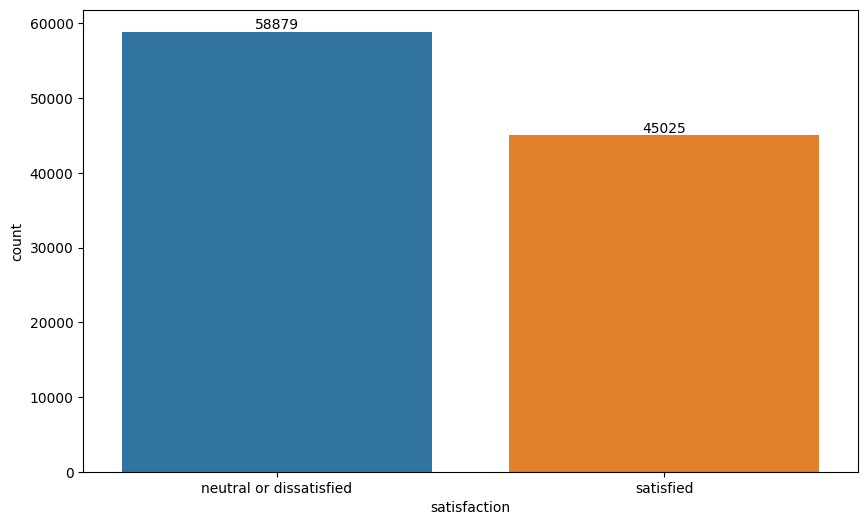

In [7]:
plt.figure(figsize=(10,6))
ax = sns.countplot(df, x = df.satisfaction)
ax.bar_label(ax.containers[0], fontsize=10);

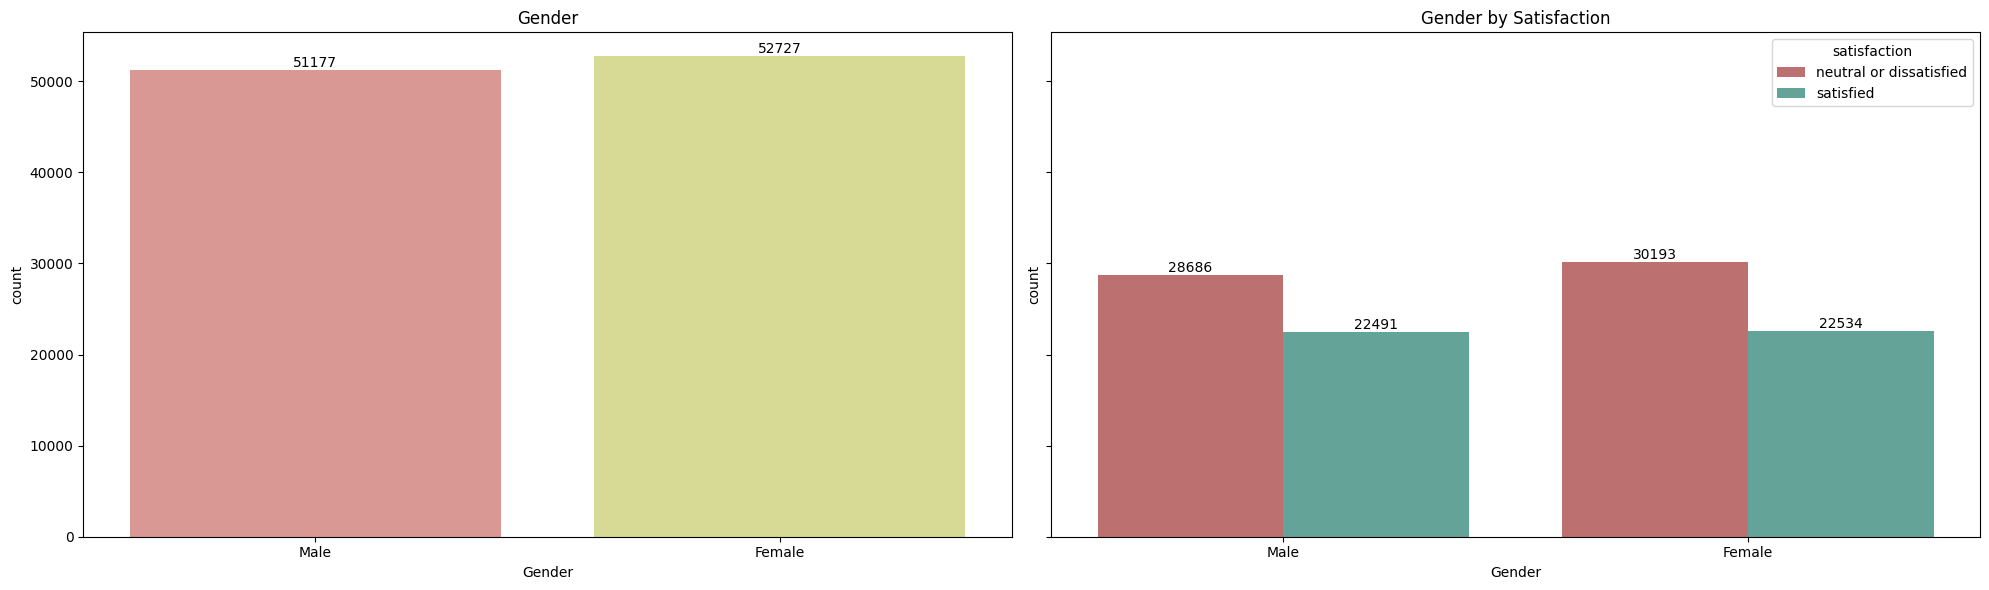

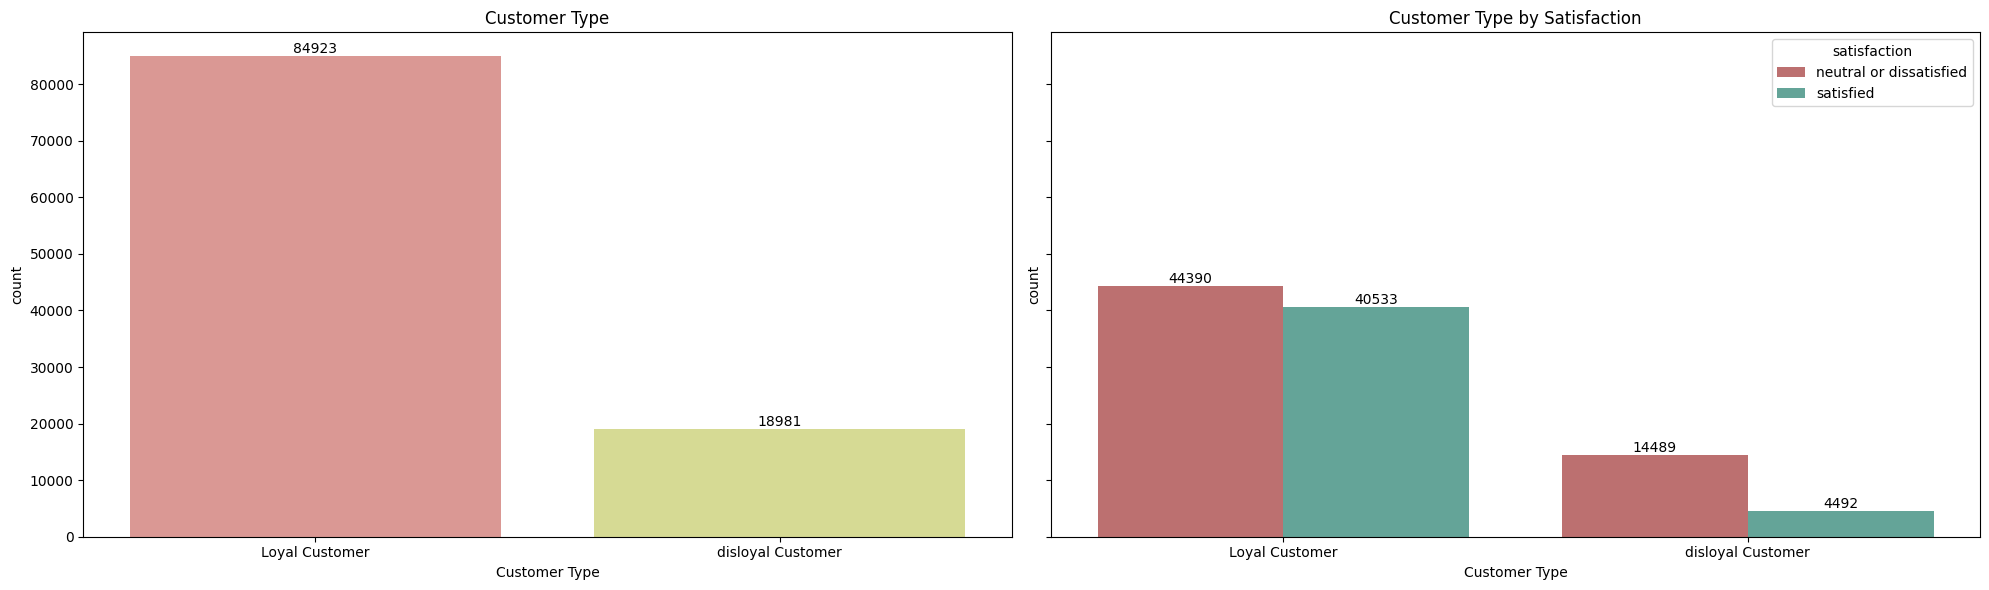

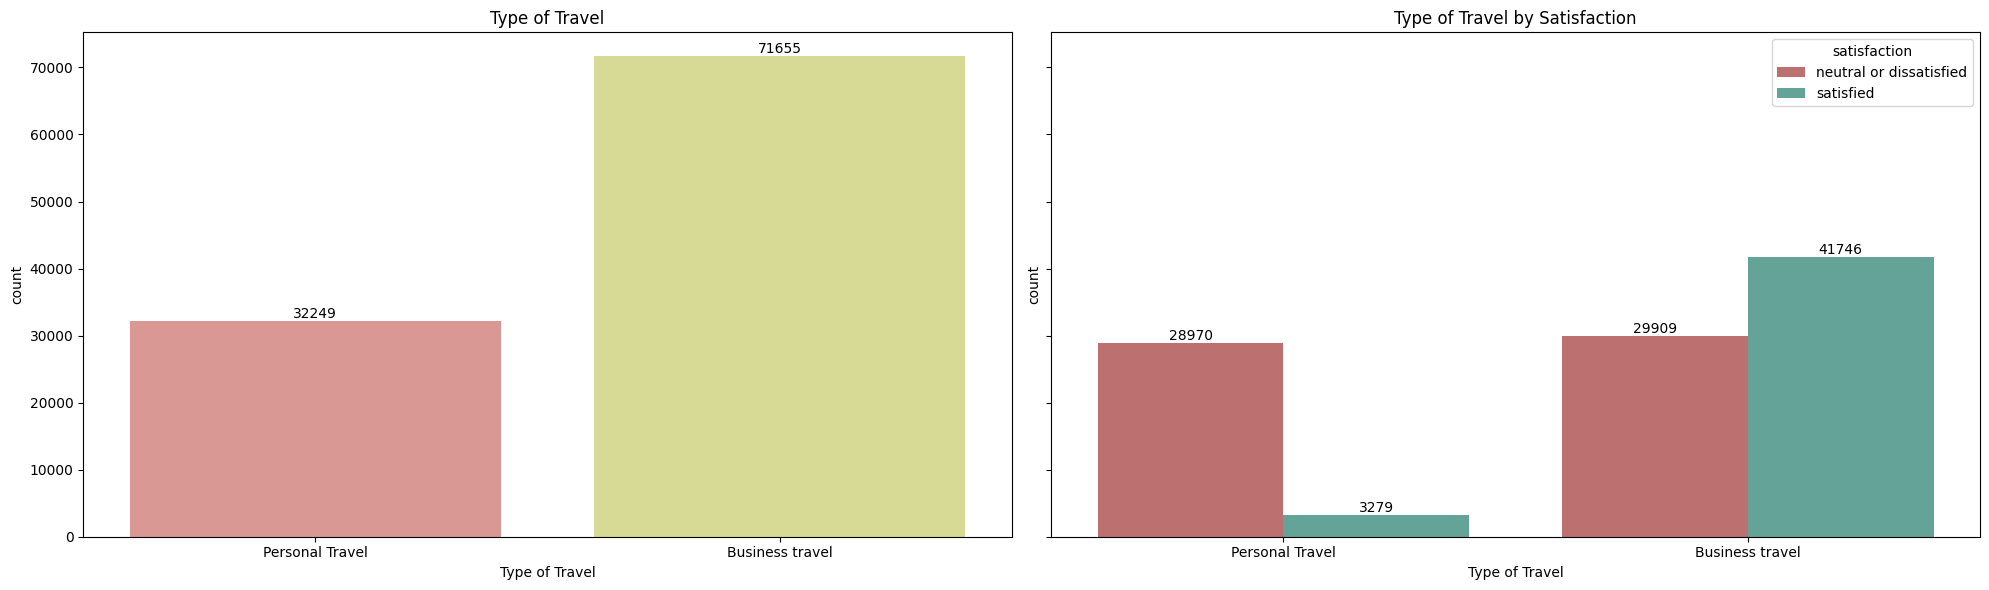

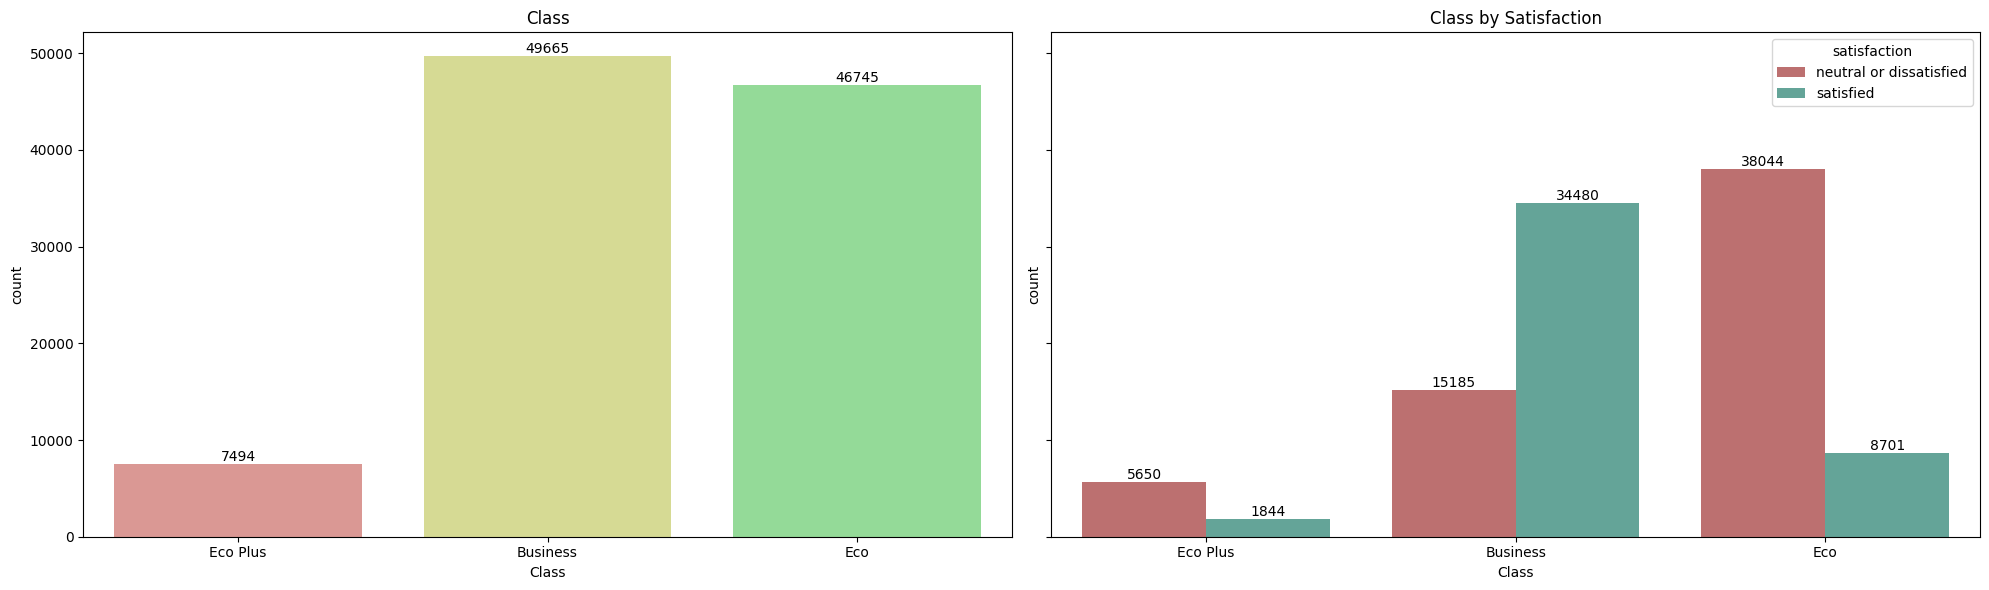

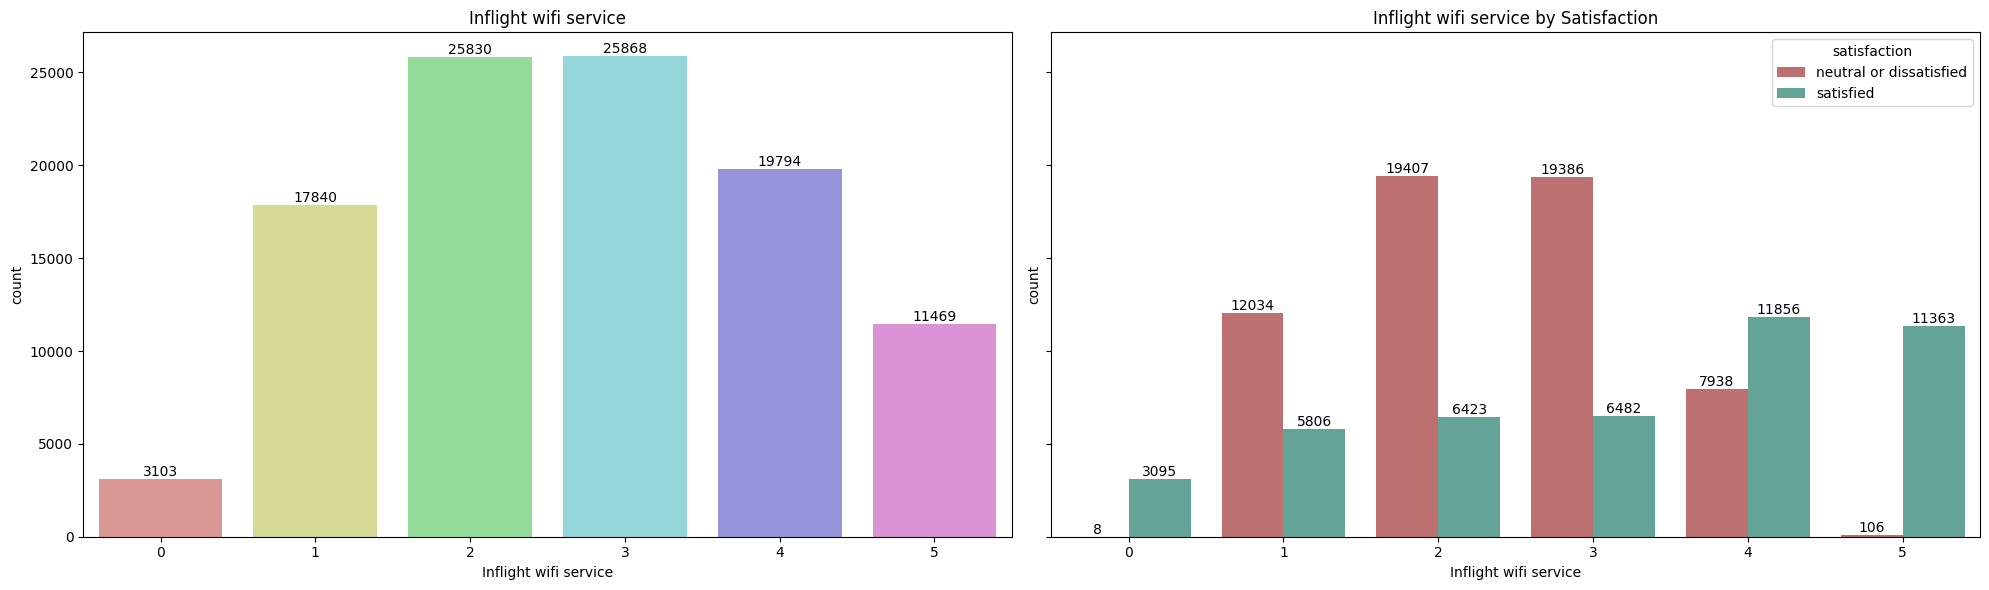

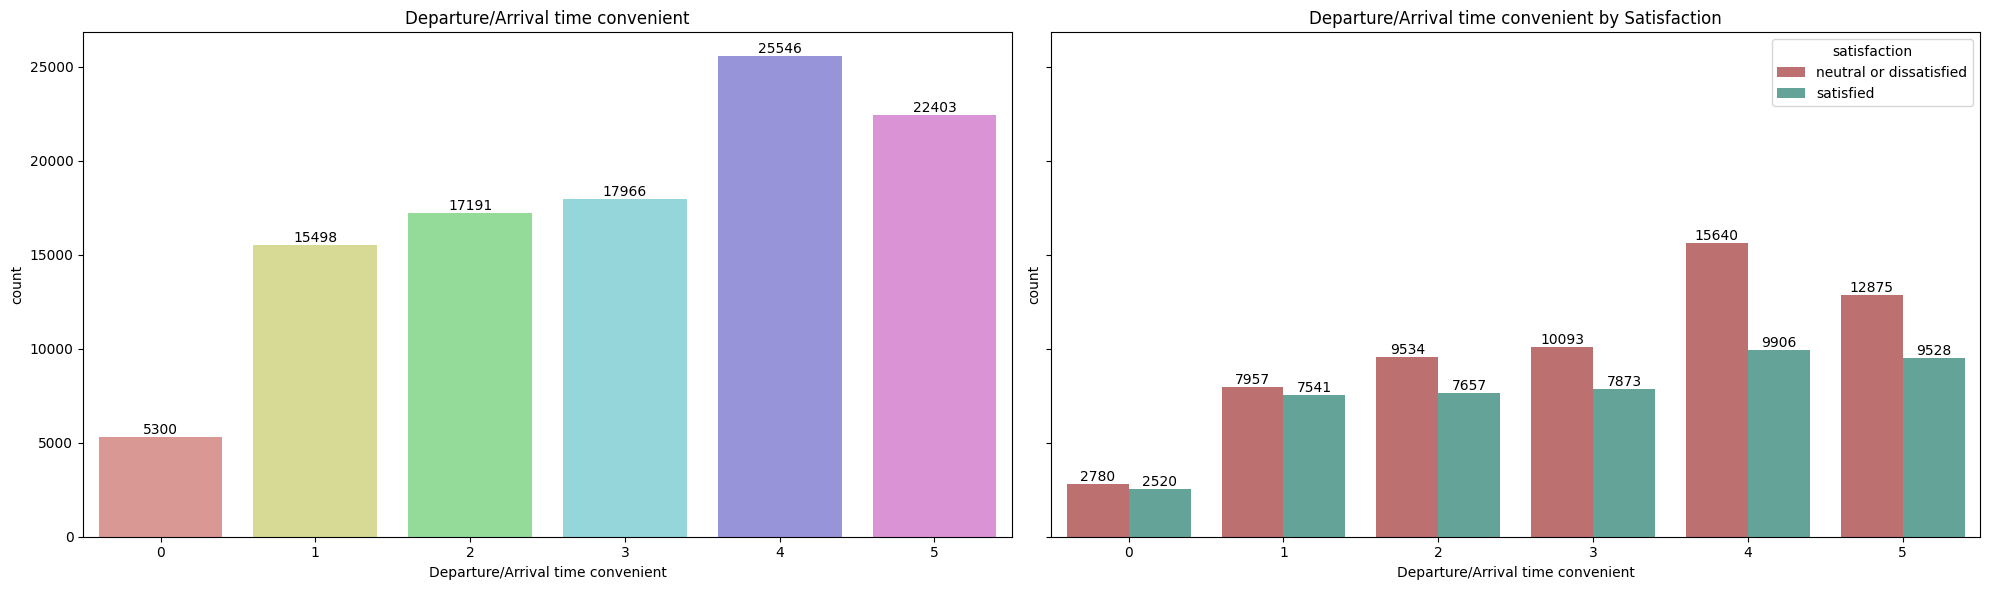

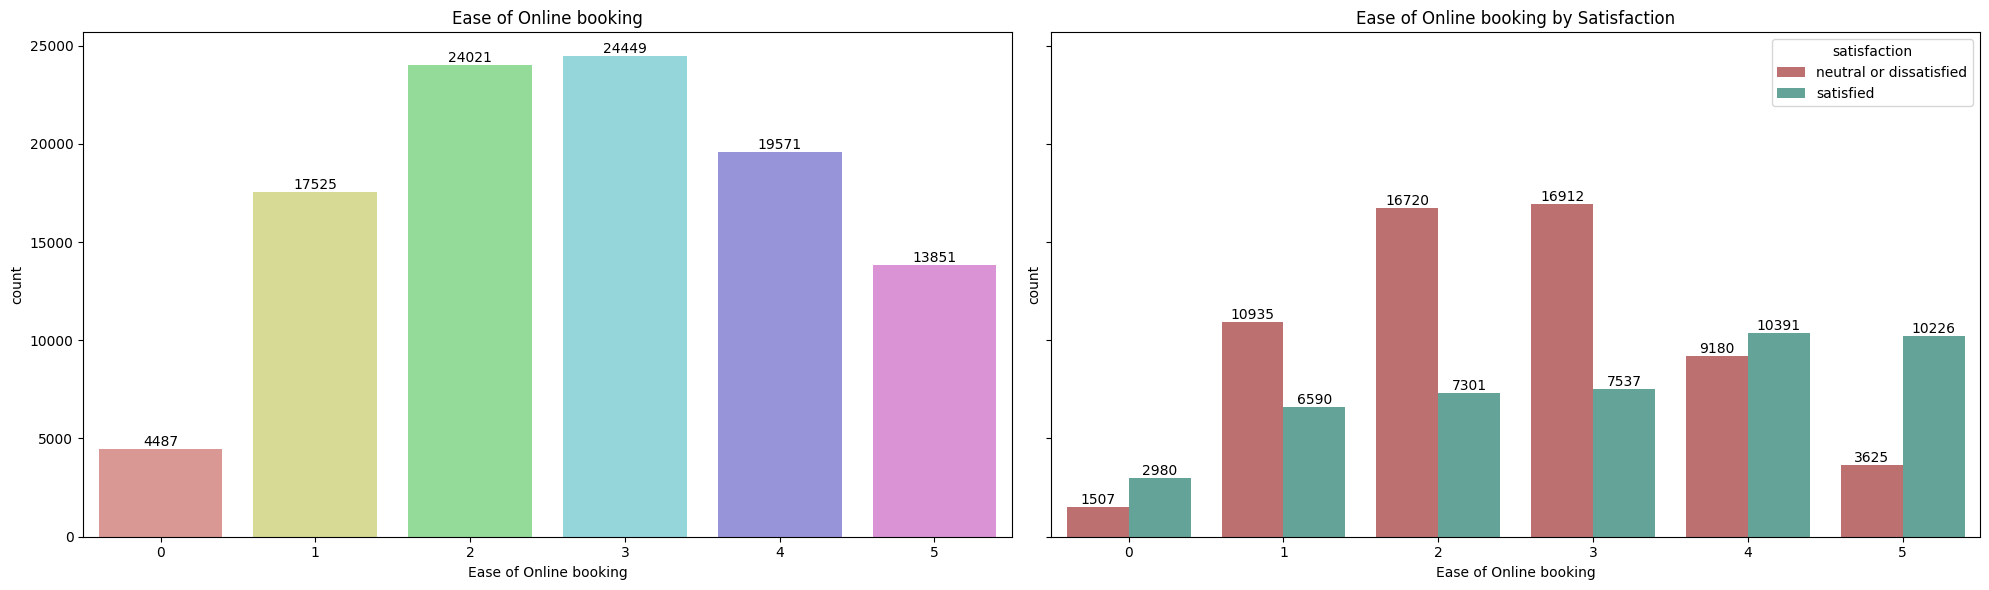

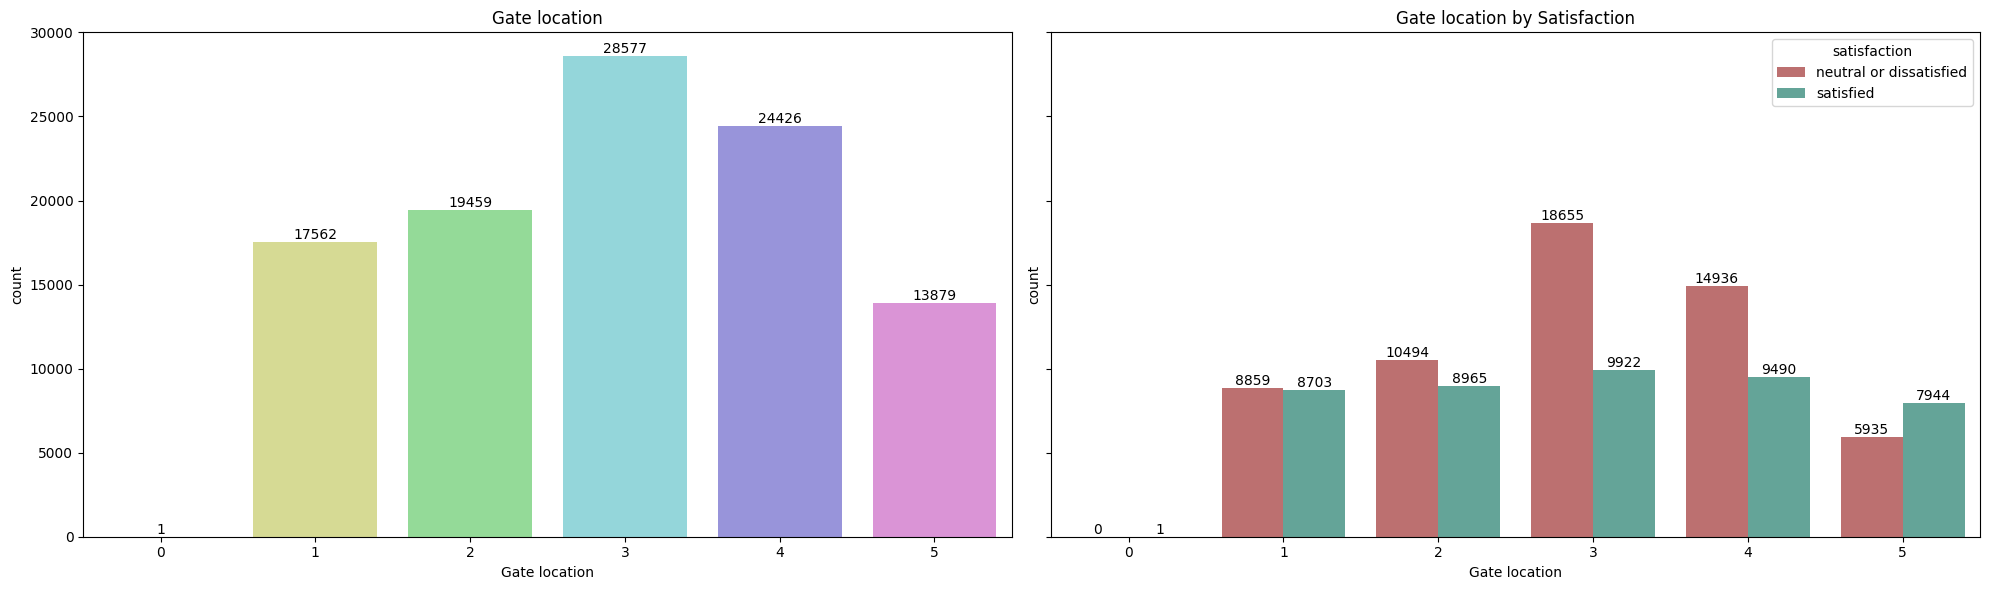

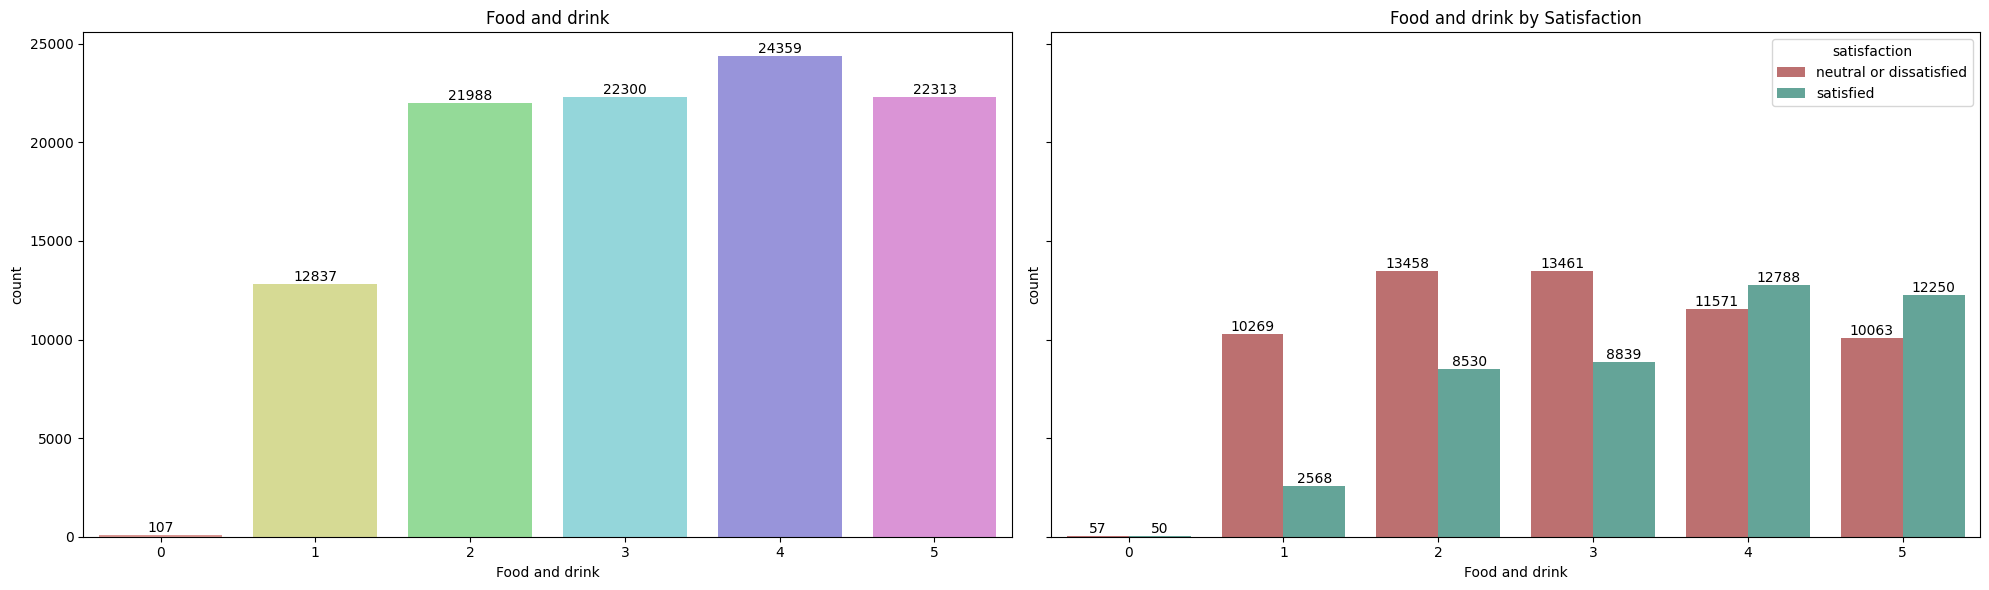

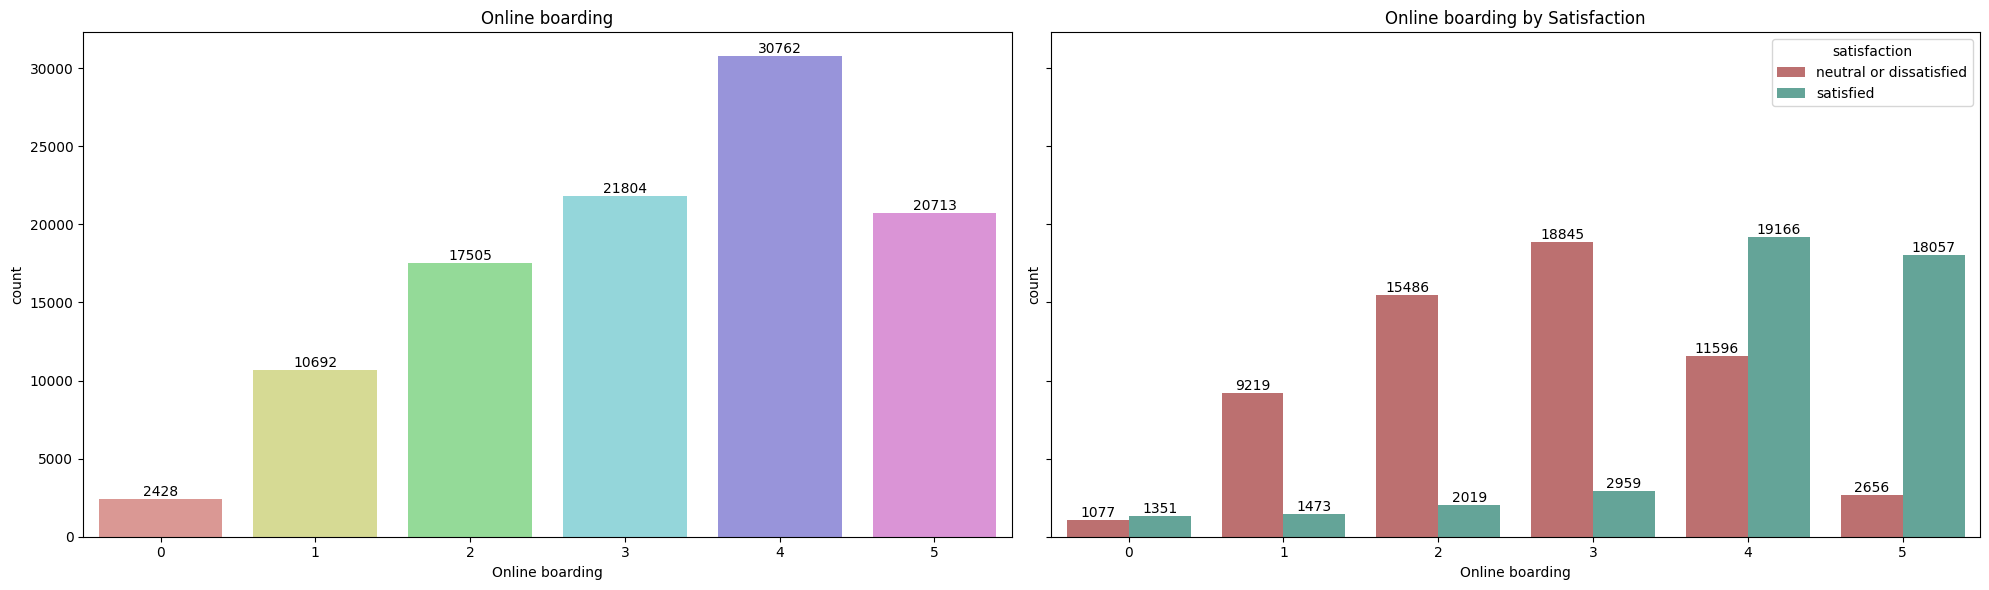

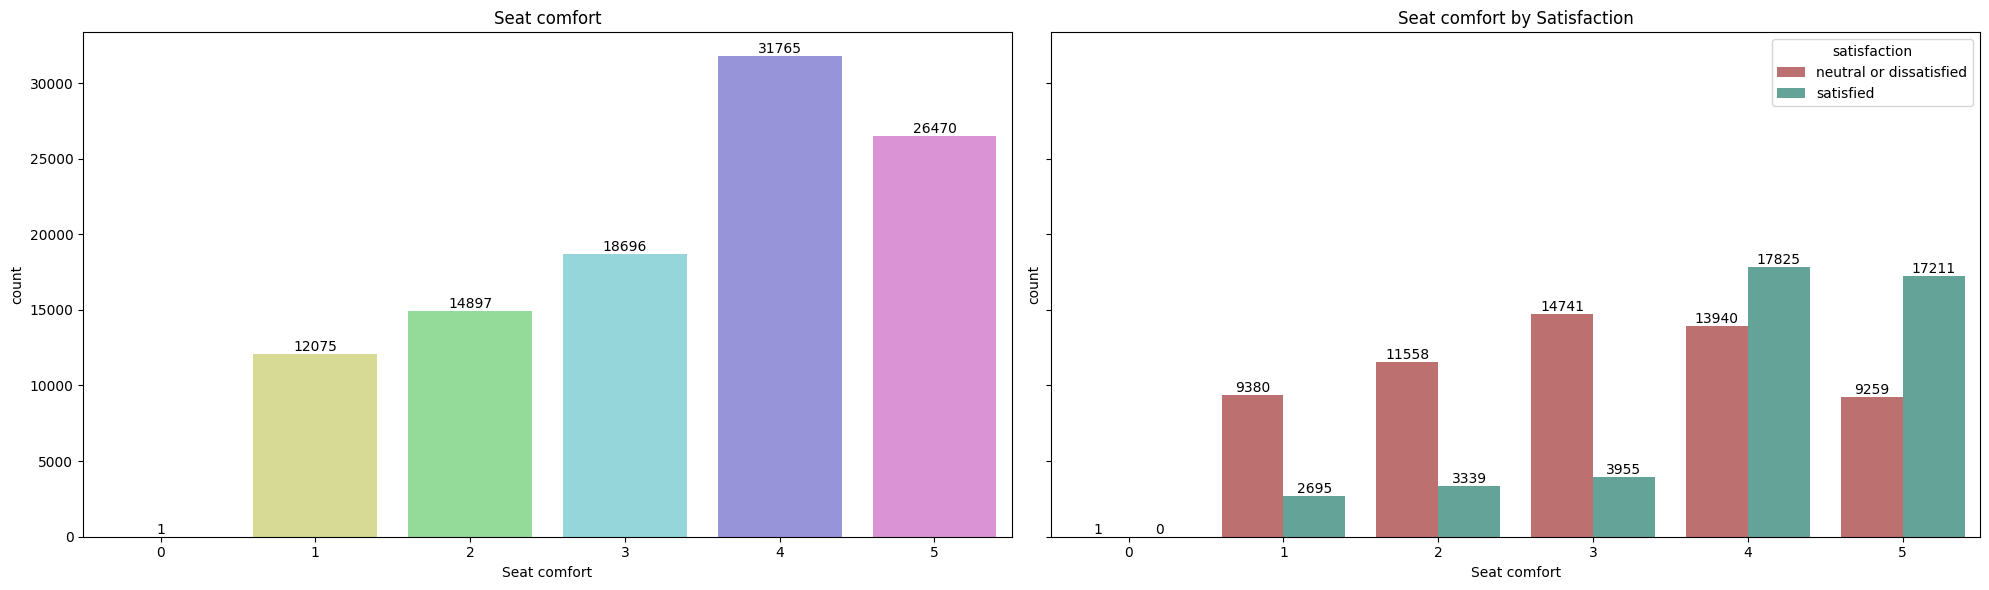

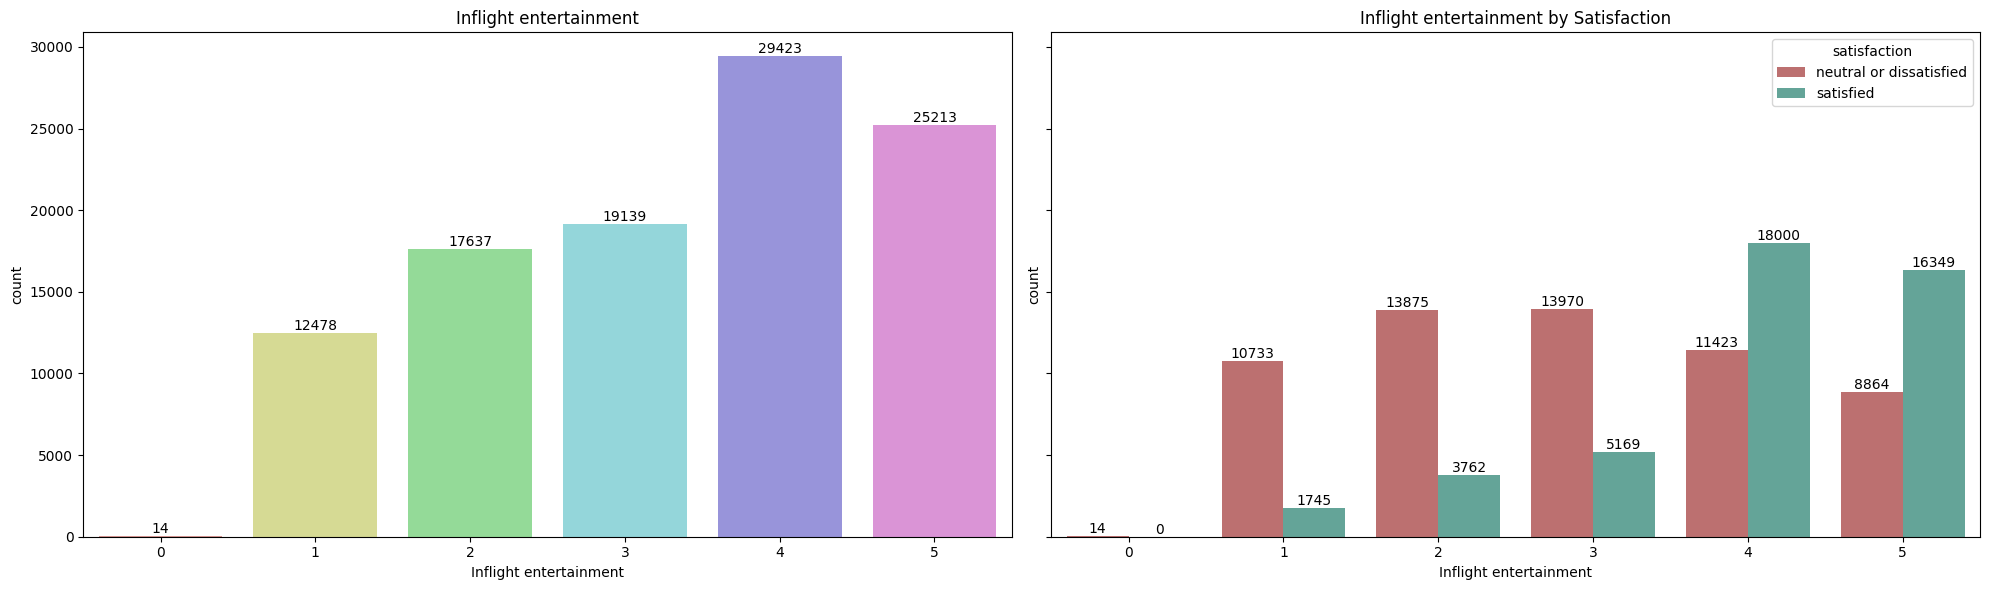

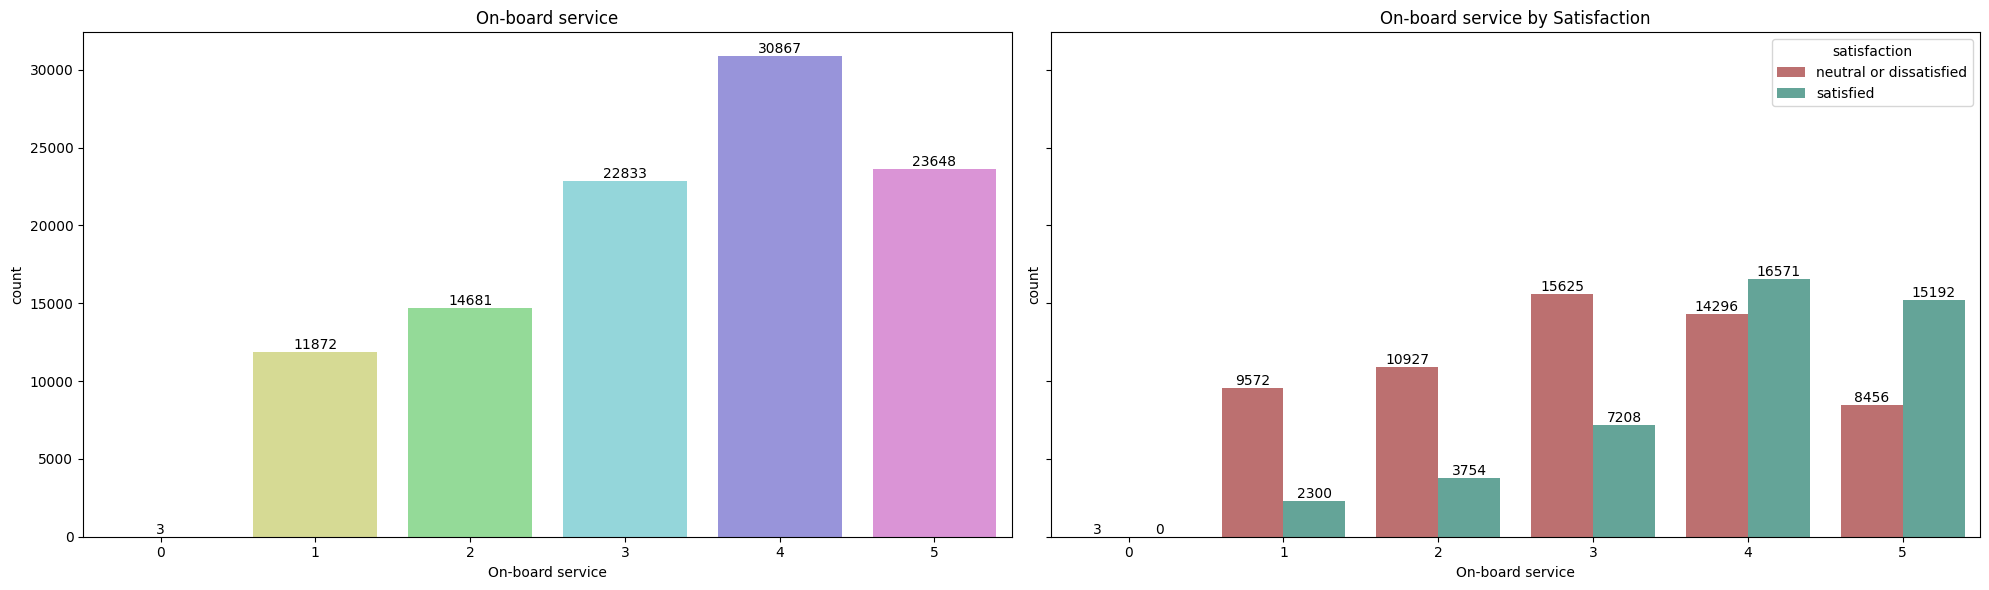

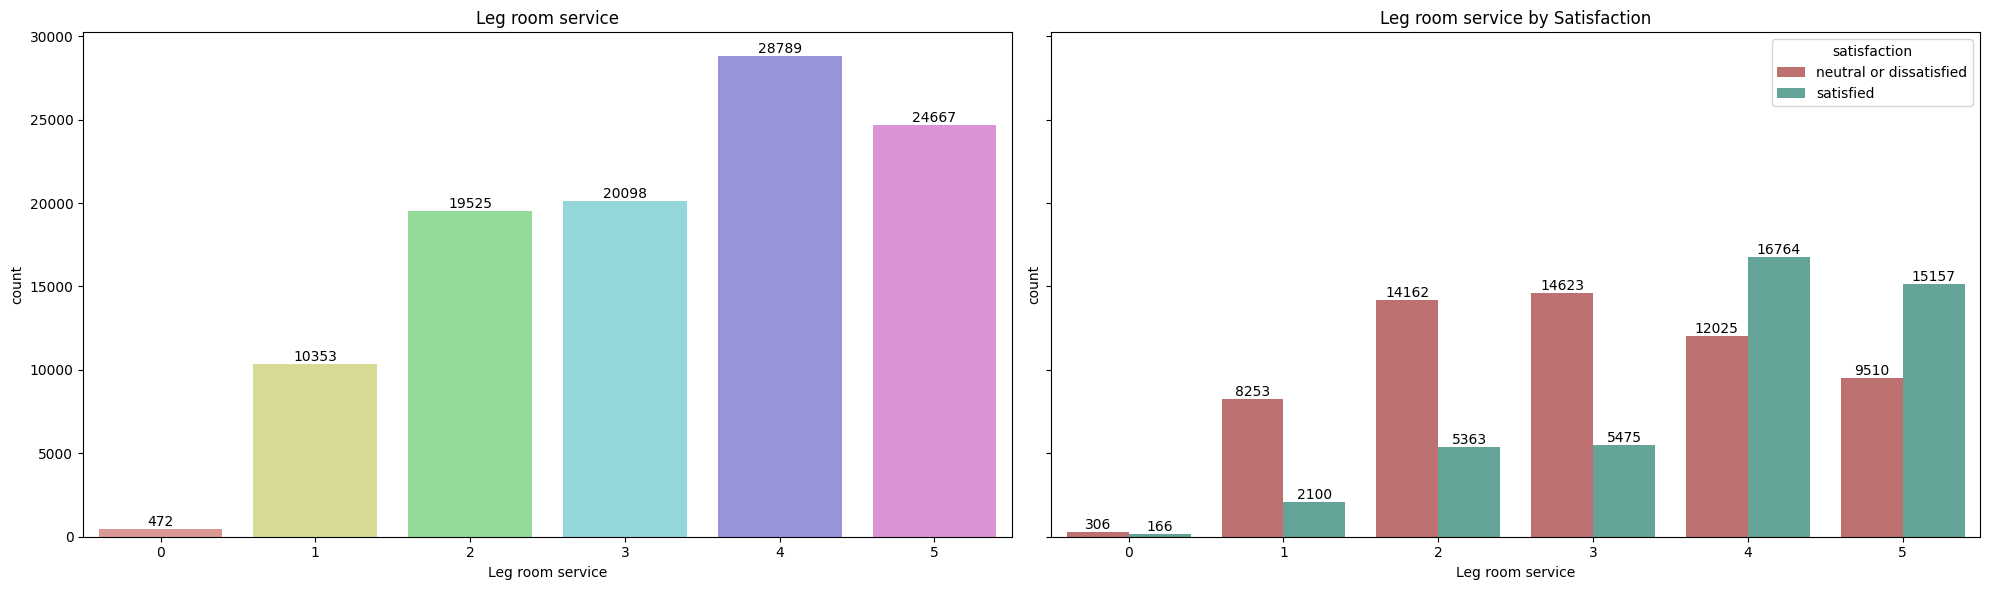

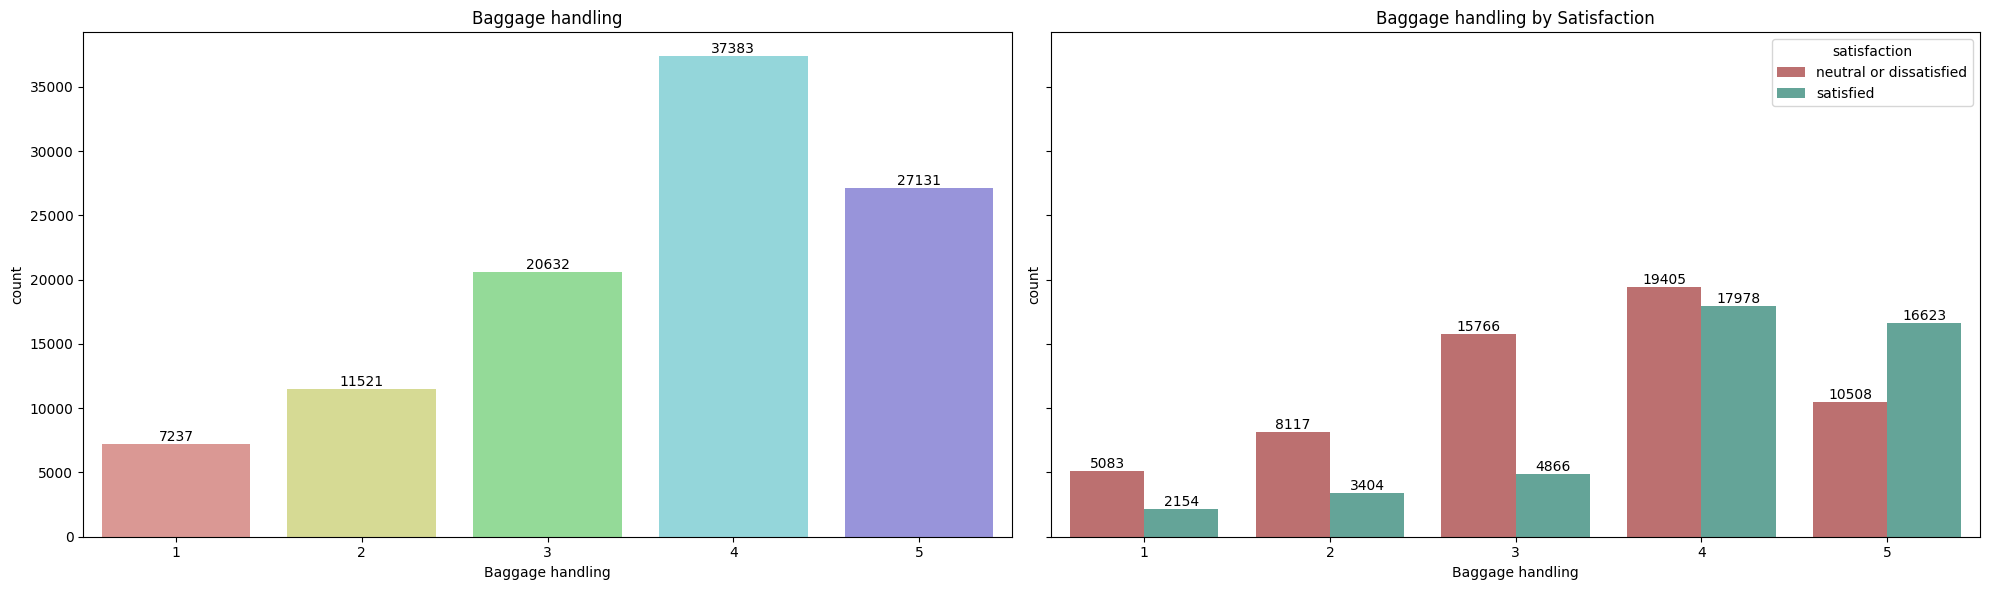

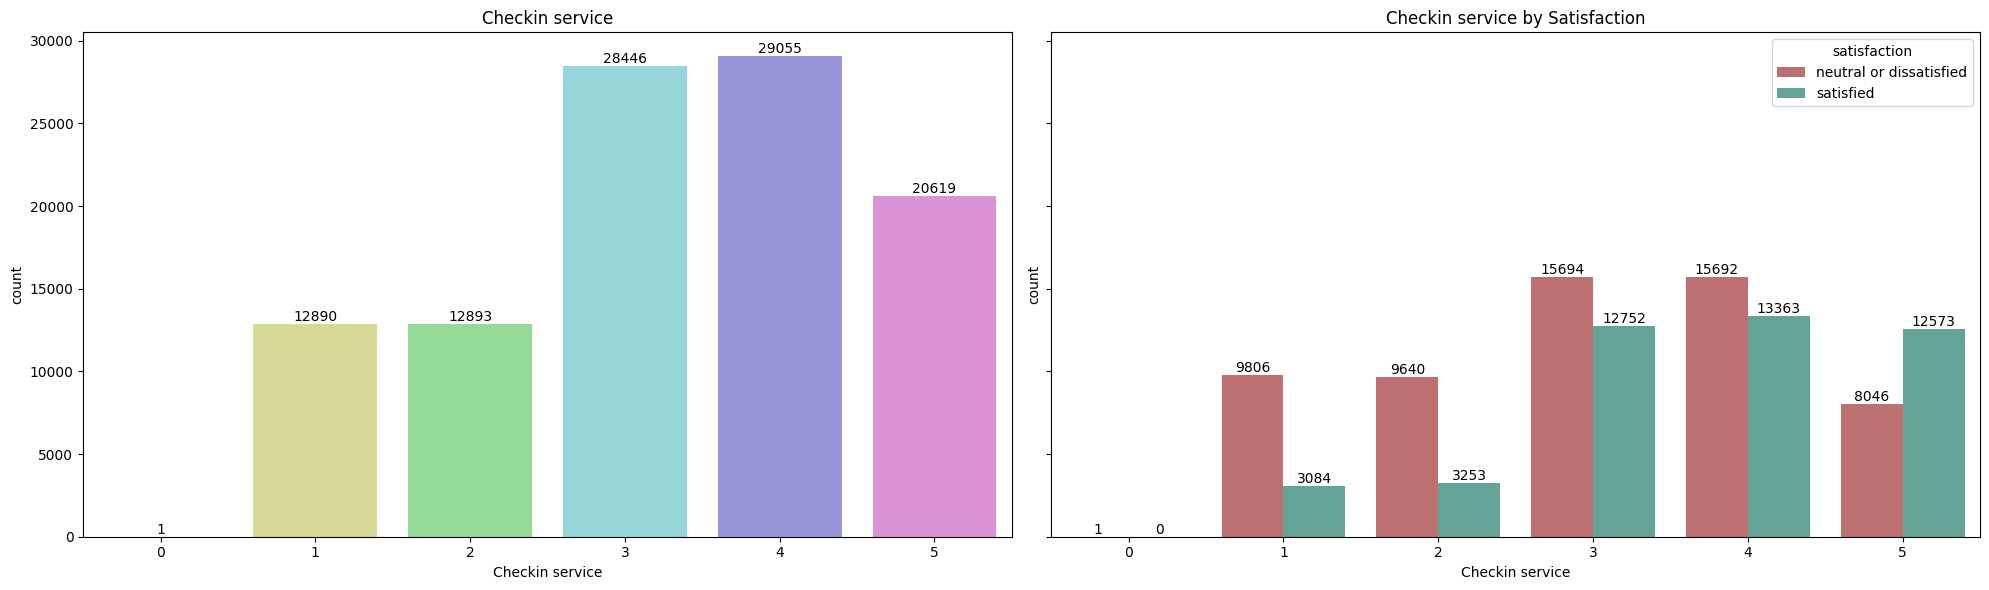

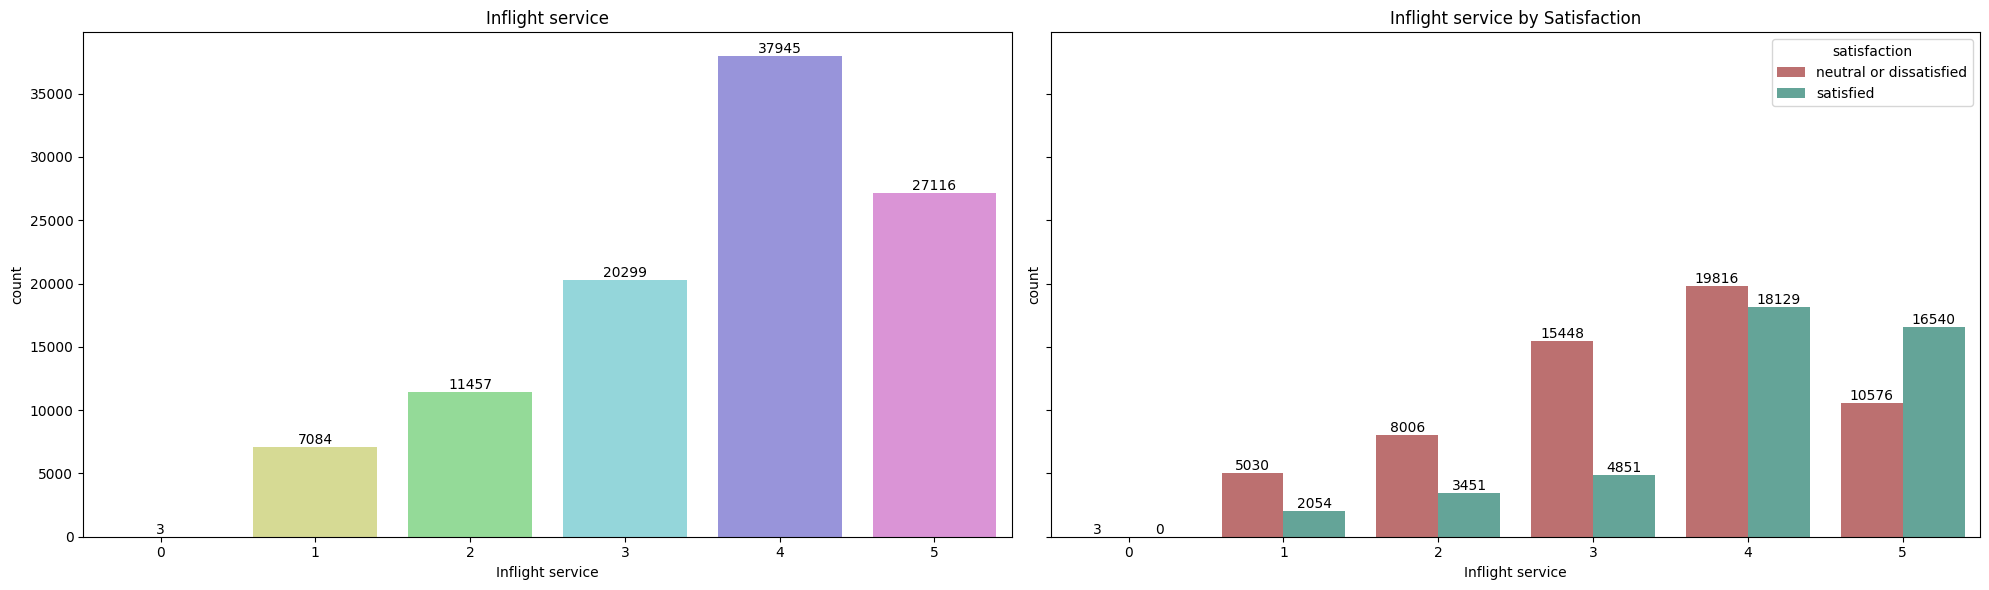

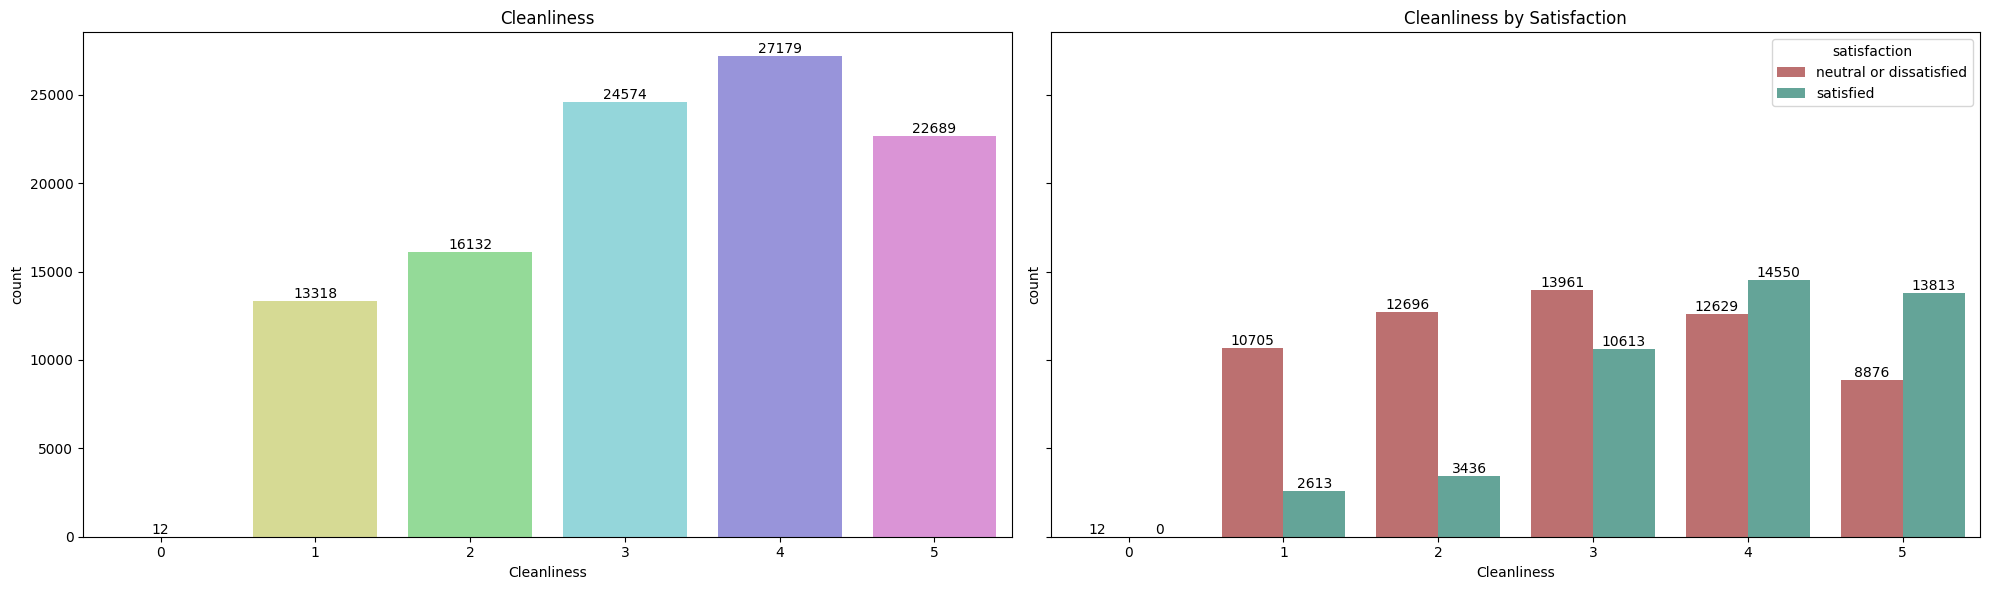

In [8]:
for i in categoric_features:
    x = i
    
    sns.set_palette("hls")
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
    
    ax1 = sns.countplot(data=df, x=x, alpha=0.7, ax=axes[0])
    ax1.set_title(i)
    ax1.bar_label(ax1.containers[0], fontsize=10)
    
    
    ax2 = sns.countplot(data=df, x=x, alpha=0.7, hue="satisfaction", ax=axes[1], palette=['firebrick','#138D75'])
    ax2.set_title(f'{i} by Satisfaction')
    for container in ax2.containers:
        ax2.bar_label(container, fontsize=10)
    
    plt.tight_layout()
    plt.show()

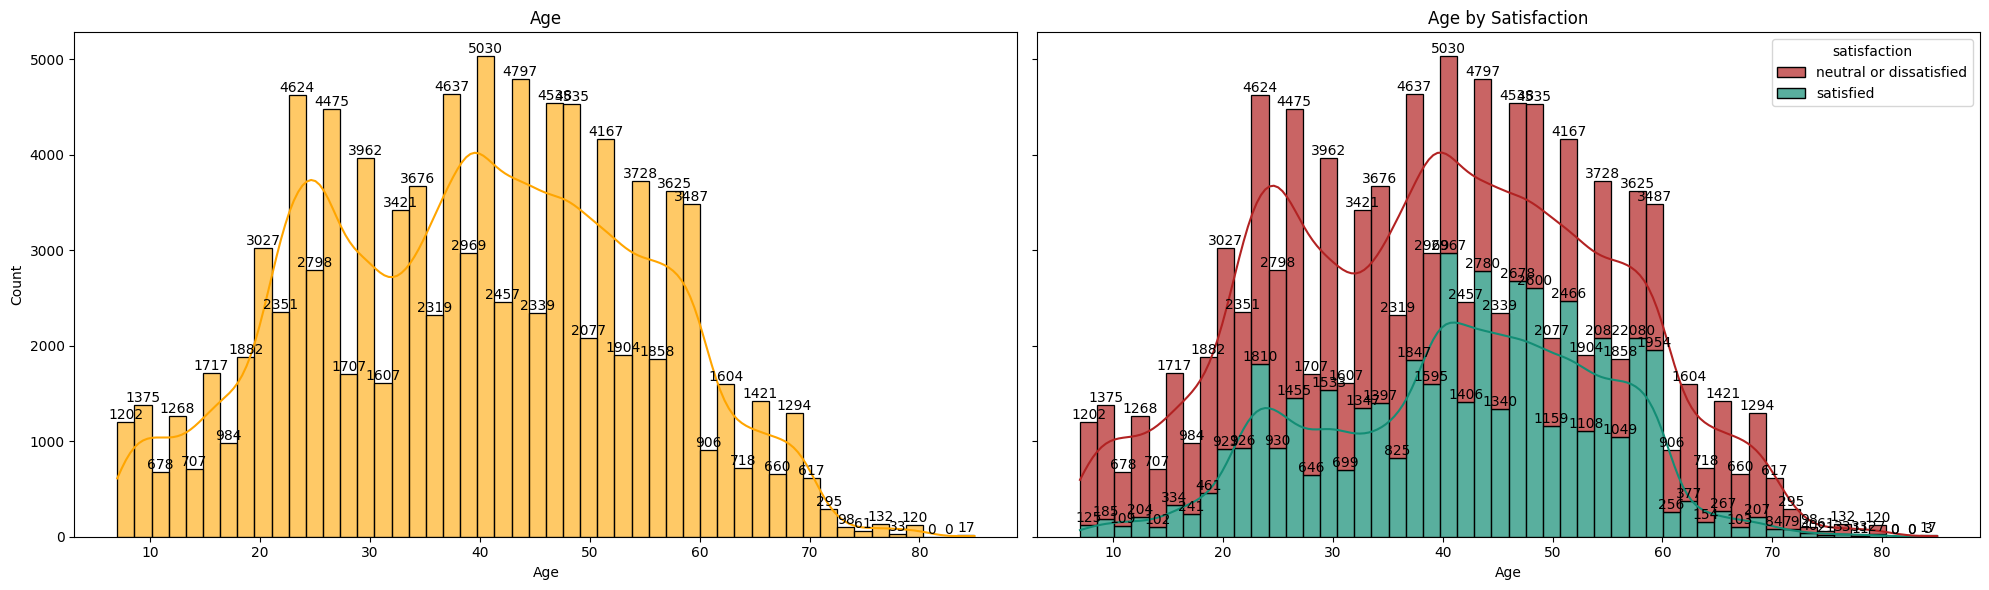

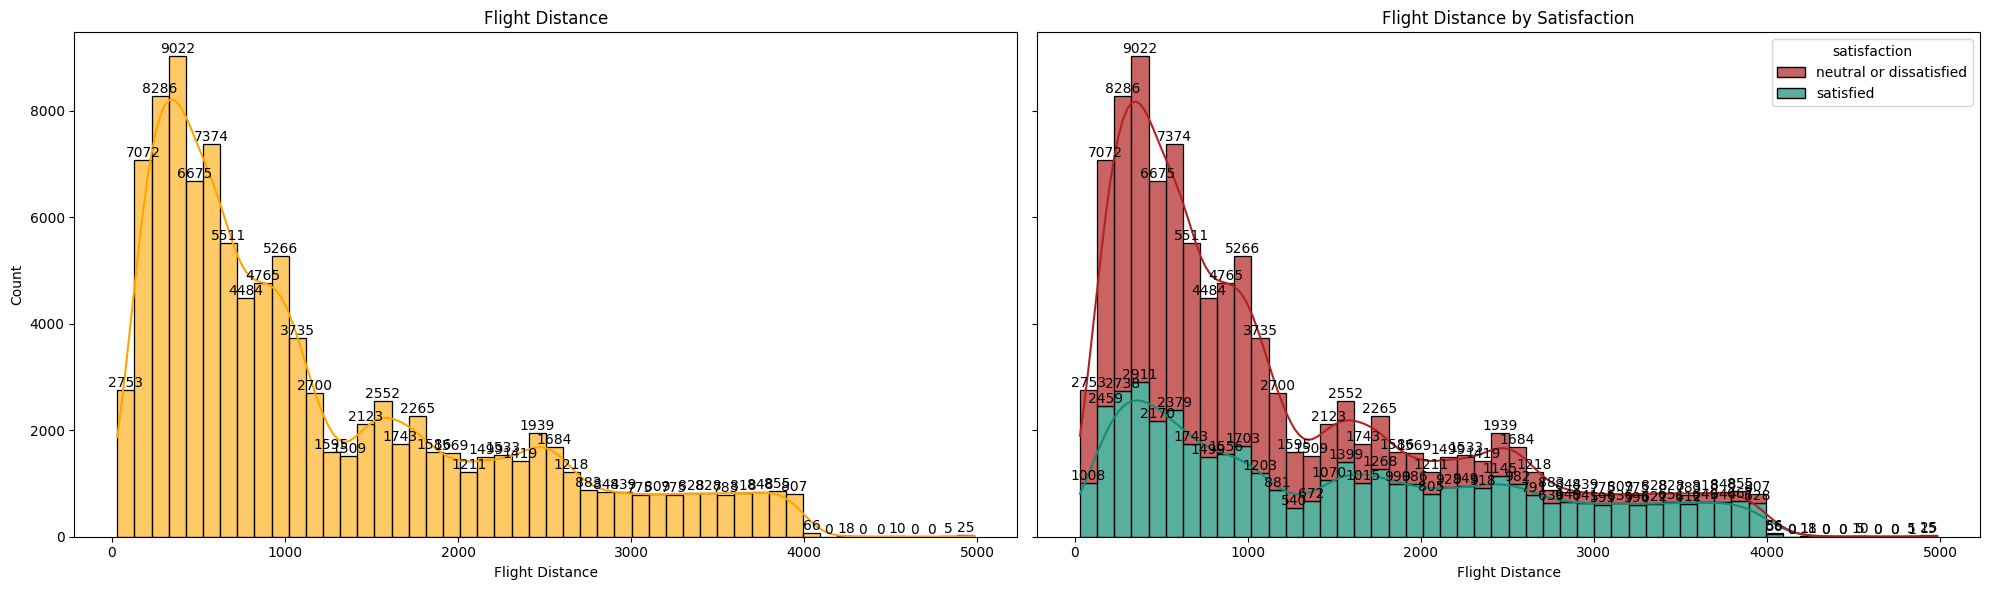

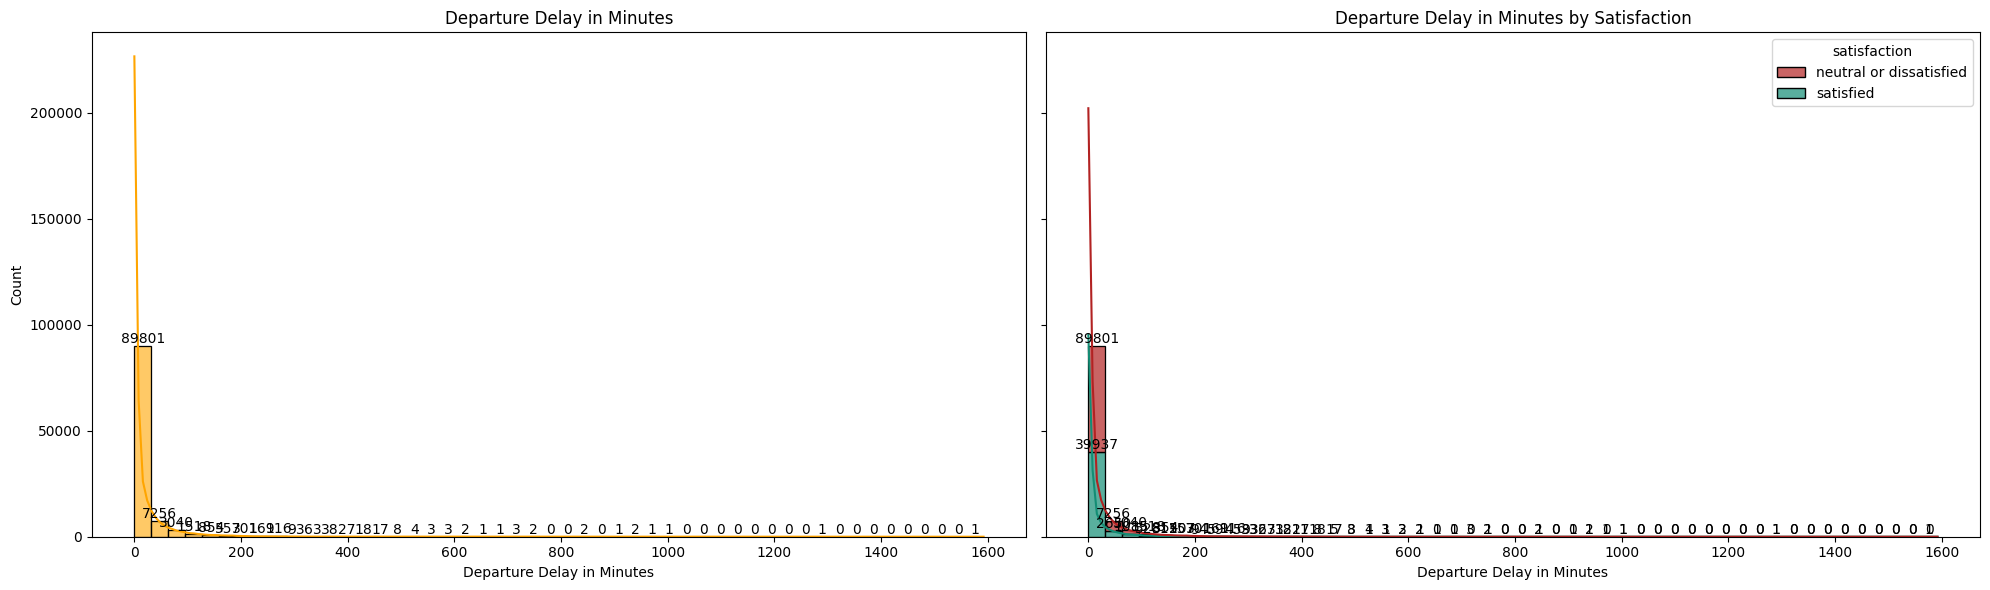

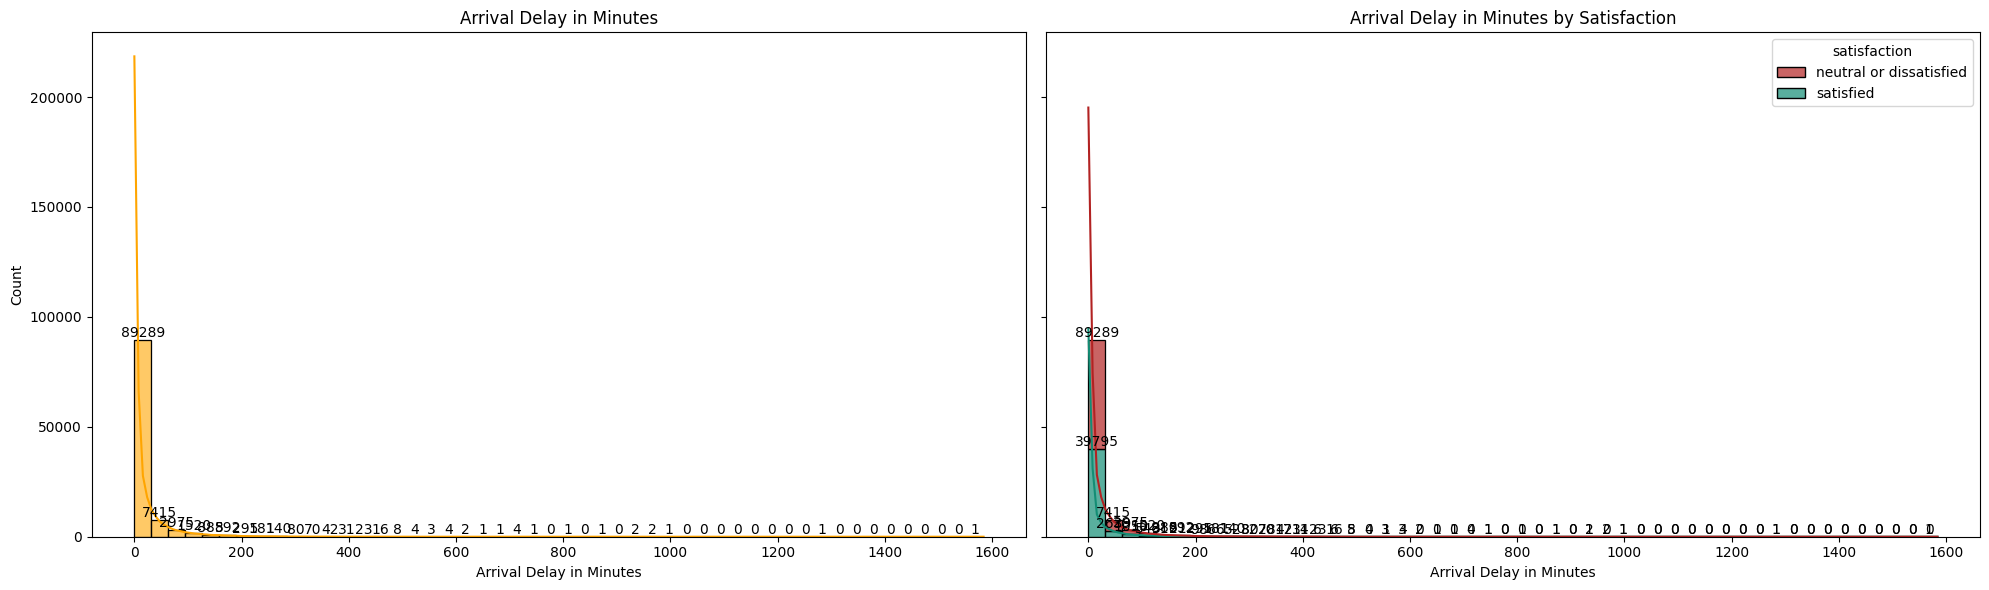

In [9]:
for i in numeric_features:
    x = i
    
    sns.set_palette("hls")
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
    
    ax1 = sns.histplot(data=df, x=x, bins=50, alpha=0.6, color='orange', kde=True, ax=axes[0])
    ax1.set_title(i)
    ax1.bar_label(ax1.containers[0], fontsize=10)
    
    sns.set_palette("muted")
    ax2 = sns.histplot(data=df, x=x, hue='satisfaction', bins=50, alpha=0.7, palette=['firebrick','#138D75'], multiple='stack', kde=True, ax=axes[1])
    ax2.set_title(f'{i} by Satisfaction')
    for container in ax2.containers:
        ax2.bar_label(container, fontsize=10)
    
    plt.tight_layout()
    plt.show()

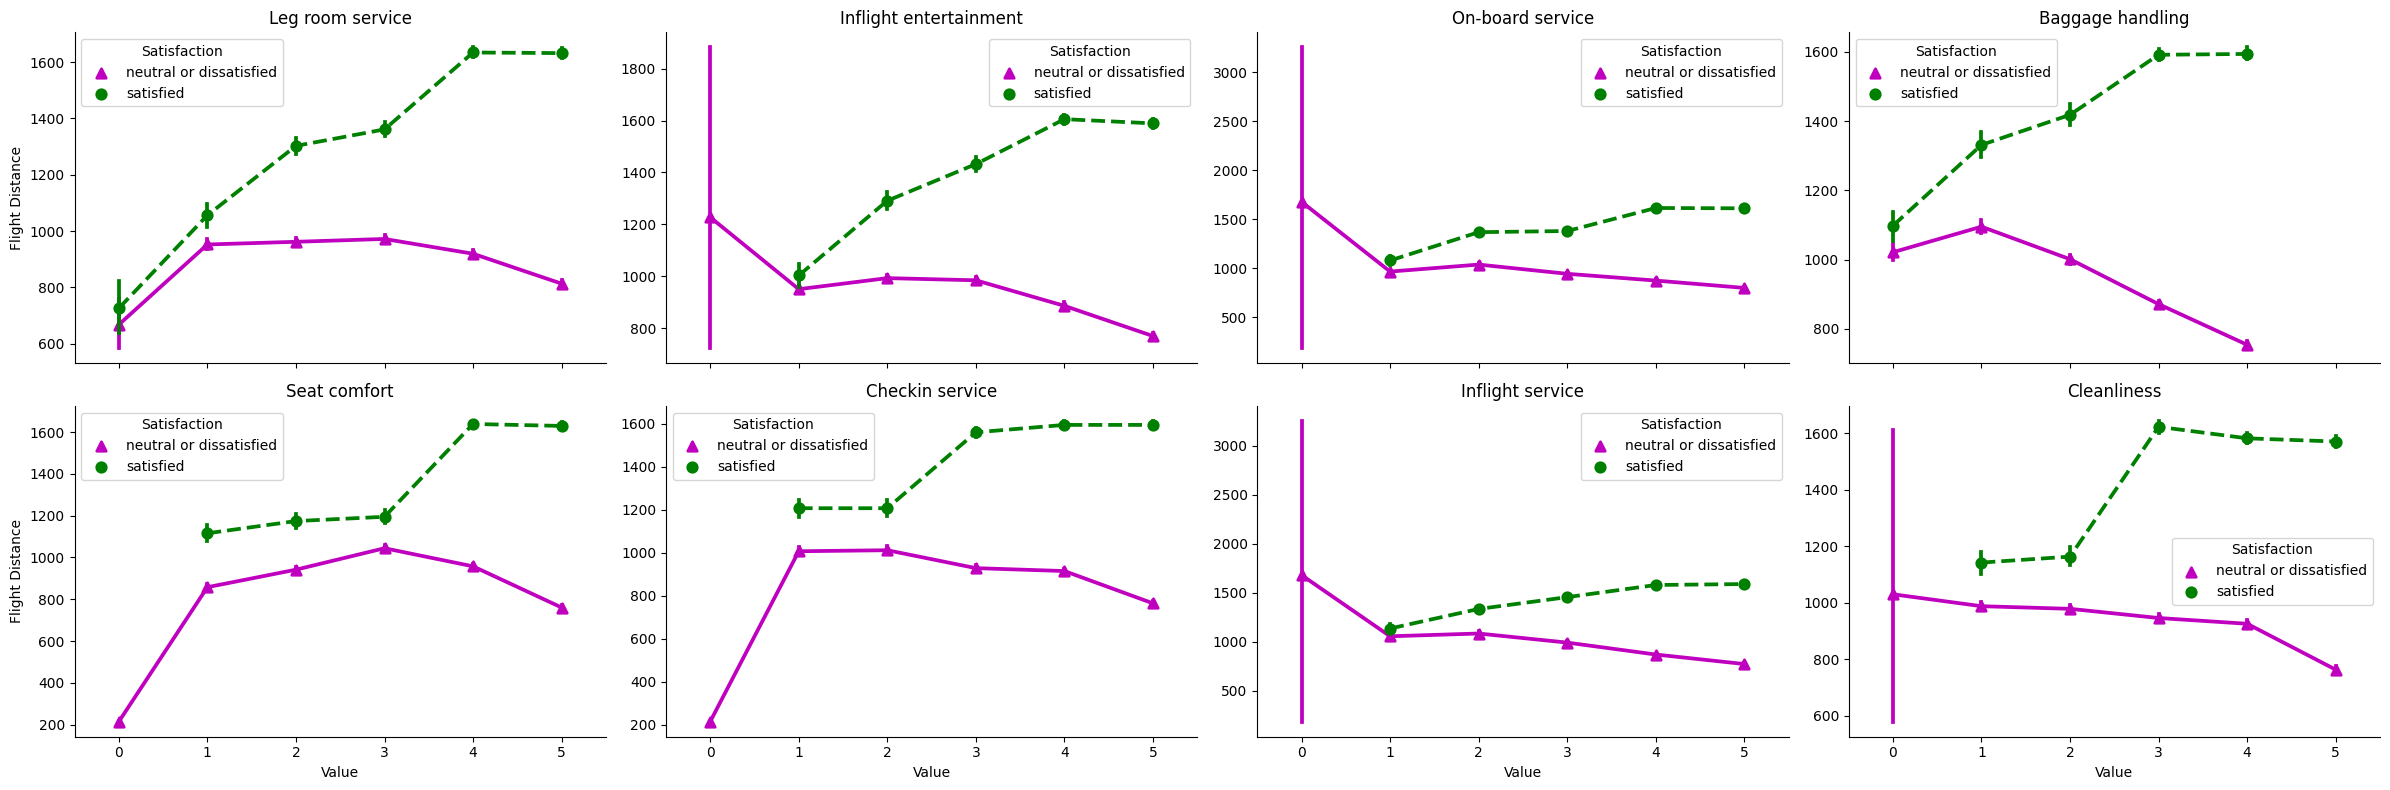

In [10]:
plot_features  = ["Leg room service","Inflight entertainment","On-board service","Baggage handling","Seat comfort","Checkin service", "Inflight service", "Cleanliness"]

df_melted = pd.melt(df, id_vars=["satisfaction", "Flight Distance"], value_vars=plot_features, 
                    var_name="Feature", value_name="Value")

g = sns.FacetGrid(df_melted, col="Feature", col_wrap=4, height=4, aspect=1.5, sharey=False)

g.map_dataframe(sns.pointplot, x="Value", y="Flight Distance", hue="satisfaction", 
                markers=["^", "o"], linestyles=["-", "--"], 
                palette={"neutral or dissatisfied": "m", "satisfied": "g"})

for ax, feature in zip(g.axes, plot_features):
    ax.set_title(feature)
    ax.legend(title="Satisfaction")

plt.tight_layout()
plt.show()

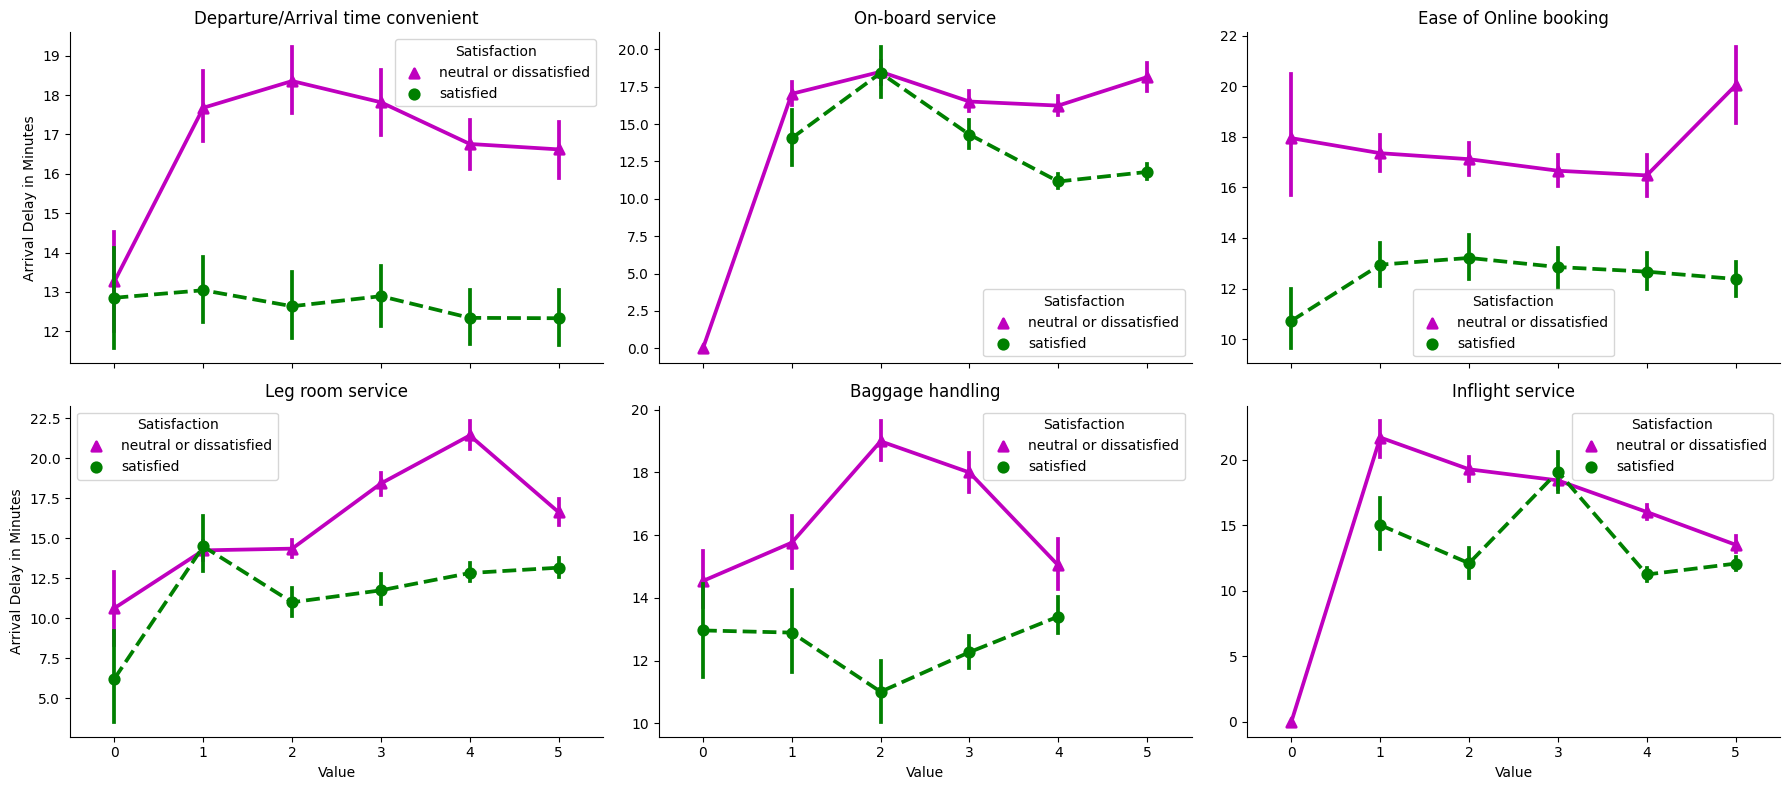

In [11]:
plot_features  = ['Departure/Arrival time convenient','On-board service', 'Ease of Online booking','Leg room service', 'Baggage handling', 'Inflight service']

df_melted = pd.melt(df, id_vars=["satisfaction", "Arrival Delay in Minutes"], value_vars=plot_features, 
                    var_name="Feature", value_name="Value")

g = sns.FacetGrid(df_melted, col="Feature", col_wrap=3, height=4, aspect=1.5, sharey=False)

g.map_dataframe(sns.pointplot, x="Value", y="Arrival Delay in Minutes", hue="satisfaction", 
                markers=["^", "o"], linestyles=["-", "--"], 
                palette={"neutral or dissatisfied": "m", "satisfied": "g"})

for ax, feature in zip(g.axes, plot_features):
    ax.set_title(feature)
    ax.legend(title="Satisfaction")

plt.tight_layout()
plt.show()

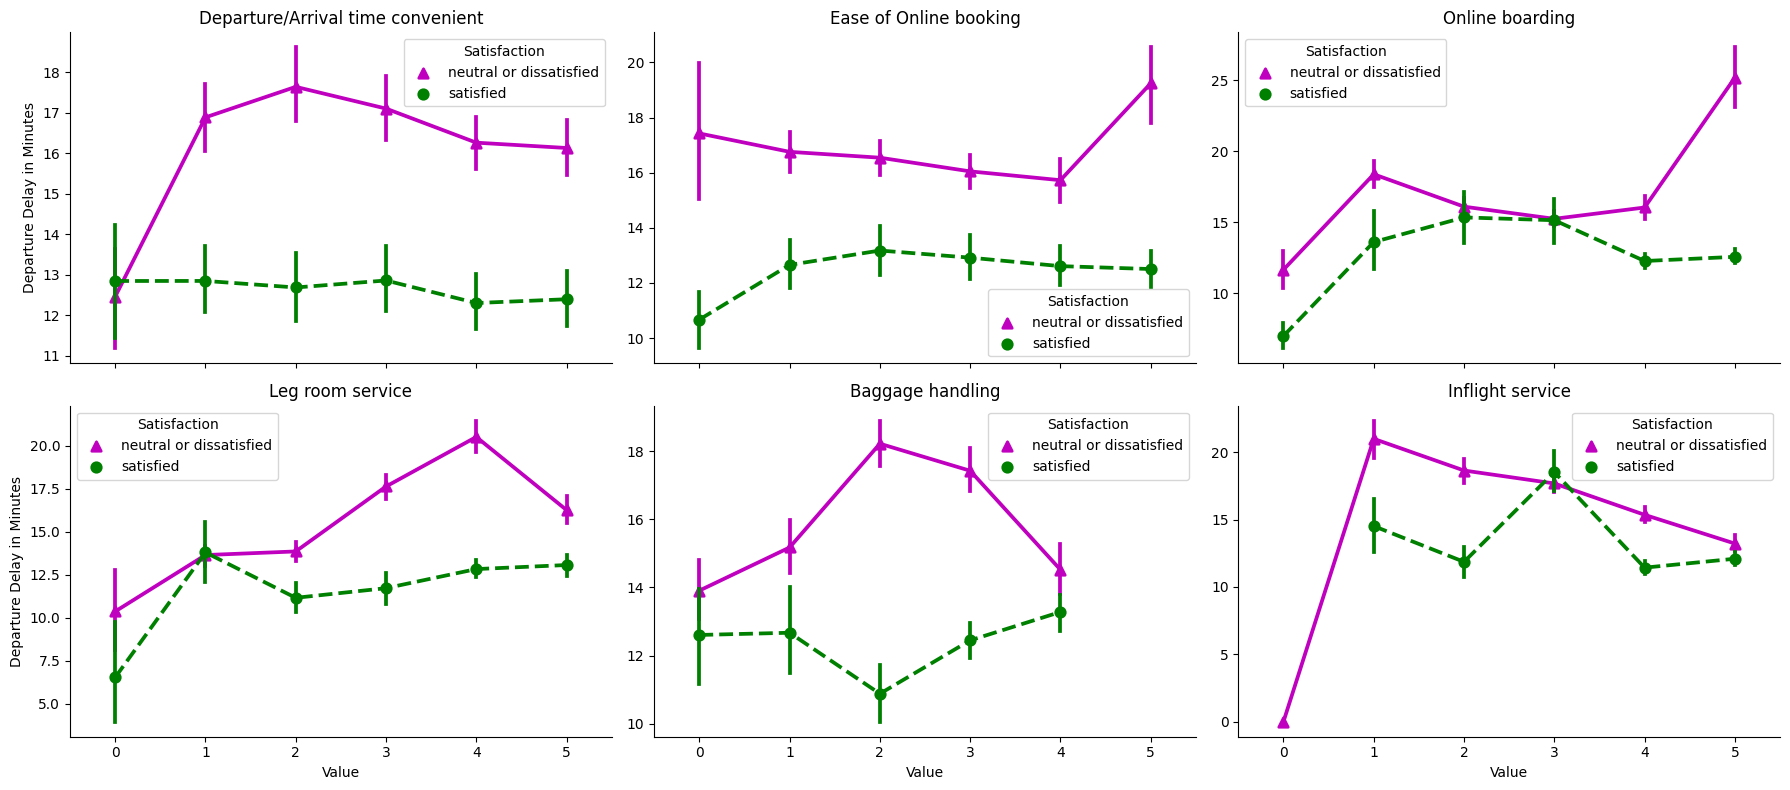

In [12]:
plot_features  = ['Departure/Arrival time convenient', 'Ease of Online booking', 'Online boarding', 'Leg room service', 'Baggage handling','Inflight service']

df_melted = pd.melt(df, id_vars=["satisfaction", "Departure Delay in Minutes"], value_vars=plot_features, 
                    var_name="Feature", value_name="Value")

g = sns.FacetGrid(df_melted, col="Feature", col_wrap=3, height=4, aspect=1.5, sharey=False)

g.map_dataframe(sns.pointplot, x="Value", y="Departure Delay in Minutes", hue="satisfaction", 
                markers=["^", "o"], linestyles=["-", "--"], 
                palette={"neutral or dissatisfied": "m", "satisfied": "g"})

for ax, feature in zip(g.axes, plot_features):
    ax.set_title(feature)
    ax.legend(title="Satisfaction")

plt.tight_layout()
plt.show()

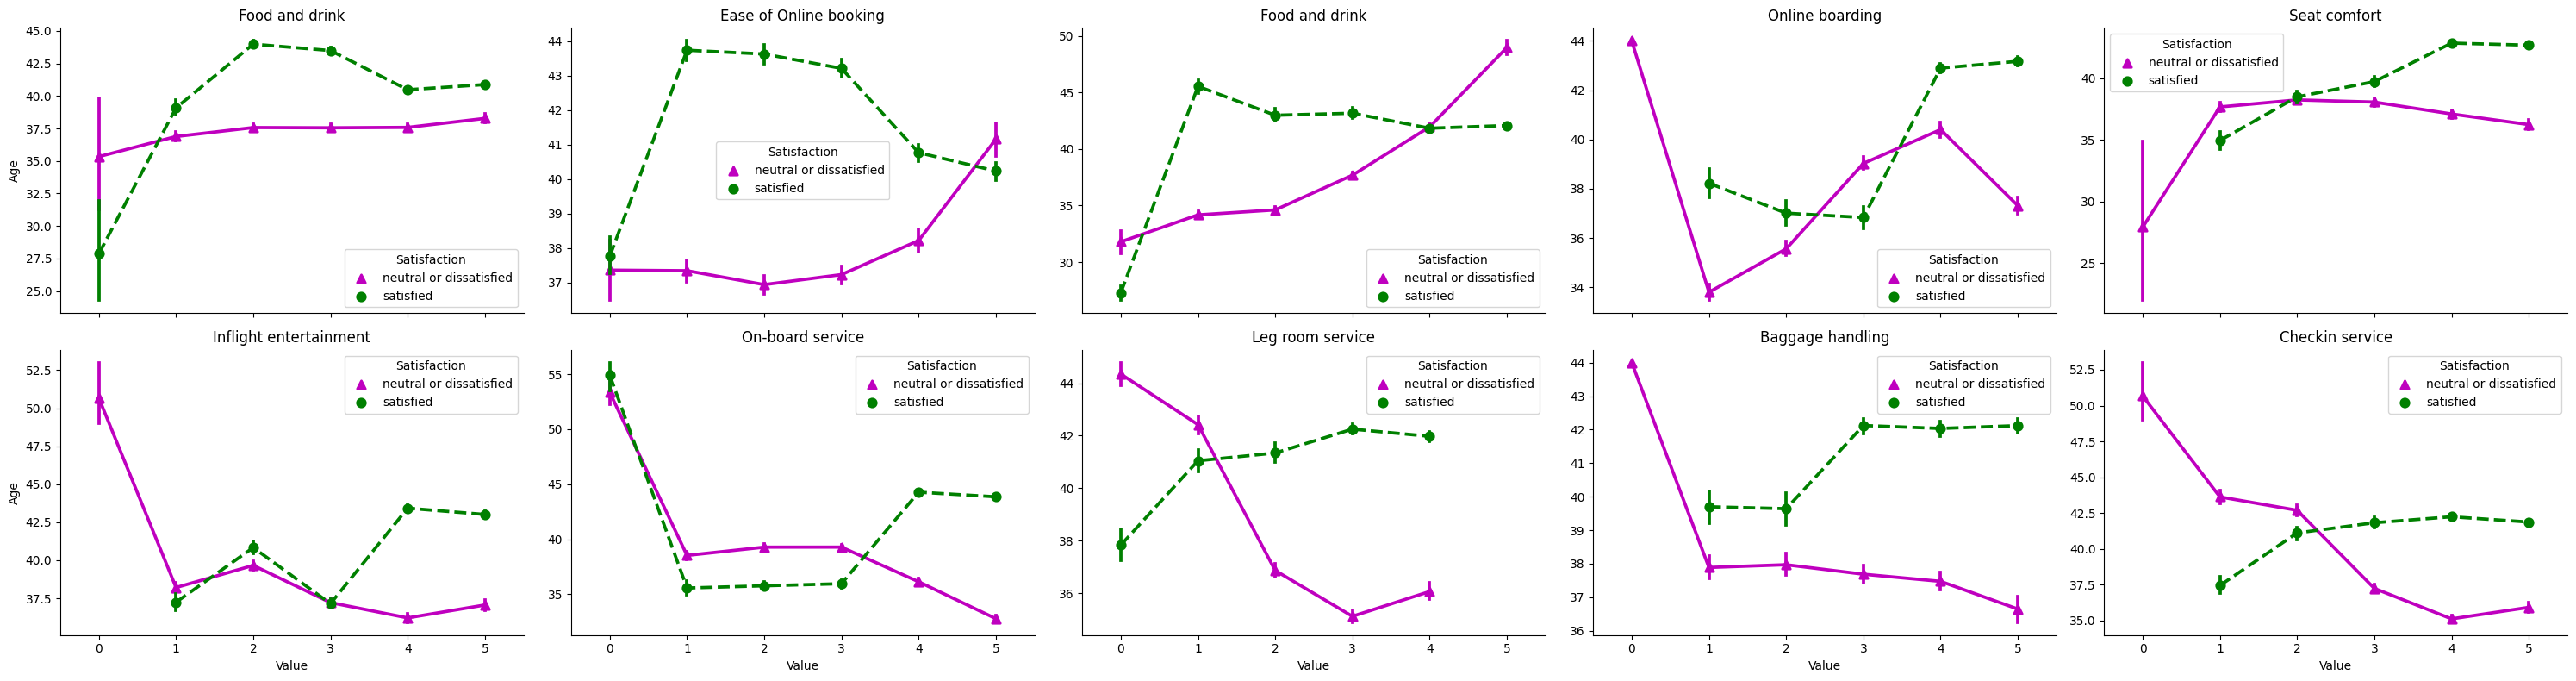

In [13]:
plot_features  = ['Food and drink', 'Ease of Online booking','Food and drink', 'Online boarding', 'Seat comfort',
                  'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service'] 

df_melted = pd.melt(df, id_vars=["satisfaction", "Age"], value_vars=plot_features, 
                    var_name="Feature", value_name="Value")

g = sns.FacetGrid(df_melted, col="Feature", col_wrap=5, height=4, aspect=1.5, sharey=False)

g.map_dataframe(sns.pointplot, x="Value", y="Age", hue="satisfaction", 
                markers=["^", "o"], linestyles=["-", "--"], 
                palette={"neutral or dissatisfied": "m", "satisfied": "g"})

for ax, feature in zip(g.axes, plot_features):
    ax.set_title(feature)
    ax.legend(title="Satisfaction")

plt.tight_layout()
plt.show()

# Feature Engineering

In [14]:
df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

df = df.dropna(axis=0)

## Label Encoding

In [15]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = OneHotEncoder()

label_encoders = {}
for col in categoric_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
df["satisfaction"] = le.fit_transform(df["satisfaction"]) # satisfaction = 1 

In [16]:
df["arr_delay_distince"] = df["Arrival Delay in Minutes"]/   df["Flight Distance"]    
df["total_delay"] = df["Departure Delay in Minutes"] + df["Arrival Delay in Minutes"]

### validation feature engireering

In [17]:
df_val = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

df_val = df_val.dropna(axis=0)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_encoders = {}
for col in categoric_features:
    le = LabelEncoder()
    df_val[col] = le.fit_transform(df_val[col])
    label_encoders[col] = le
    
df_val["satisfaction"] = le.fit_transform(df_val["satisfaction"]) # satisfaction = 1 

df_val["arr_delay_distince"] = df_val["Arrival Delay in Minutes"] / df_val["Flight Distance"]    
df_val["total_delay"]        = df_val["Departure Delay in Minutes"] + df_val["Arrival Delay in Minutes"]

y_val = df_val["satisfaction"]
X_val = df_val.drop(["satisfaction", "Unnamed: 0", "id"], axis=1)

# Modeling

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df["satisfaction"]
X = df.drop(["satisfaction", "Unnamed: 0", "id"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier()

In [19]:
param_grid={"criterion": ["gini", "entropy", "log_loss"],
            "splitter"  : ["best", "random"],
            "max_depth": [5, 10 ,20, 30 ,40],
            "min_samples_split": [2, 3, 4],
            "min_samples_leaf" : [1, 2, 3, 4, 5],
            "random_state" : [42]
             }

param_grid = {'criterion': ['entropy'], 'max_depth': [20], 'min_samples_leaf': [1], 'min_samples_split': [4], 'random_state': [42], 'splitter': ['best']}

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

dt_scores = cross_val_score(best_model, X_test, y_test, cv = 10)
print("Test precision:", round(dt_scores.mean(), 4))

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42, 'splitter': 'best'}
Test precision: 0.9392


In [20]:
y_test_pred  = best_model.predict(X_test)

print("\n##--Decision Tree Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--Decision Tree Test Result--##

Test Scores
Accuracy: 0.9560306964621844
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     11655
           1       0.96      0.94      0.95      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.95      0.96     20719
weighted avg       0.96      0.96      0.96     20719

Confusion Matrix:
 [[11291   364]
 [  547  8517]]


In [21]:
y_val_pred  = best_model.predict(X_val)

print("\n##--Decision Tree on Validation Set Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


##--Decision Tree on Validation Set Result--##

Test Scores
Accuracy: 0.8957247132429614
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     14528
           1       0.93      0.83      0.87     11365

    accuracy                           0.90     25893
   macro avg       0.90      0.89      0.89     25893
weighted avg       0.90      0.90      0.89     25893

Confusion Matrix:
 [[13779   749]
 [ 1951  9414]]


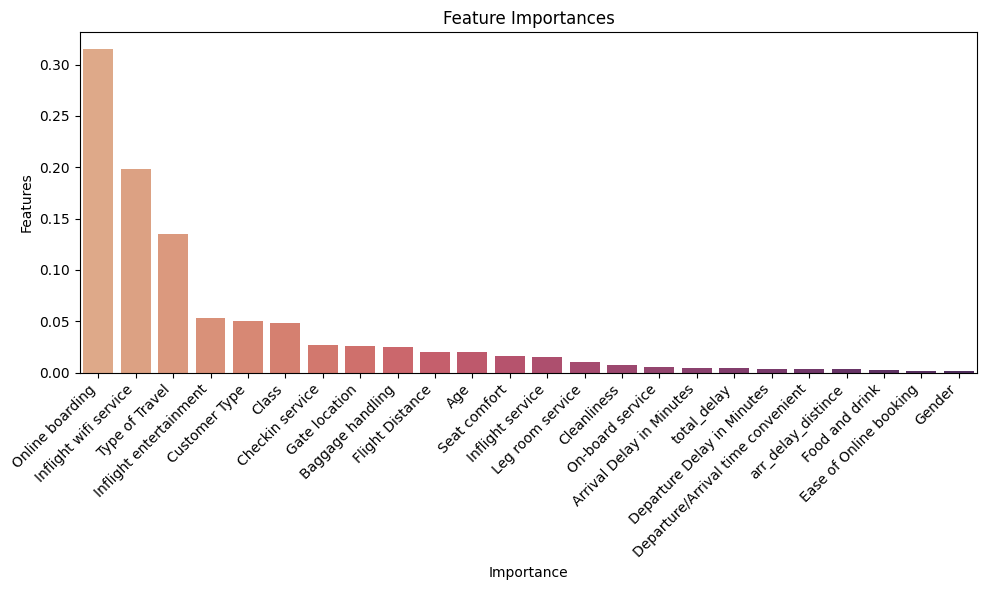

In [22]:
feature_importances = np.array(best_model.feature_importances_)
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by = "Importance",  ascending=False)
feature_importances = feature_importances.reset_index(drop = True)


plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importances, palette='flare')

plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [23]:
param_grid={"criterion": ["gini", "entropy", "log_loss"],
            "splitter"  : ["best", "random"],
            "max_depth": [5, 10 ,20, 30 ,40],
            "min_samples_split": [2, 3, 4],
            "min_samples_leaf" : [1, 2, 3, 4, 5],
            "random_state" : [42]
             }

param_grid = {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [1], 'min_samples_split': [4], 'random_state': [42], 'splitter': ['best']}

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

dt_scores_entp = cross_val_score(best_model, X_test, y_test, cv = 10)
print("Test precision:", round(dt_scores.mean(), 4))

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 42, 'splitter': 'best'}
Test precision: 0.9392


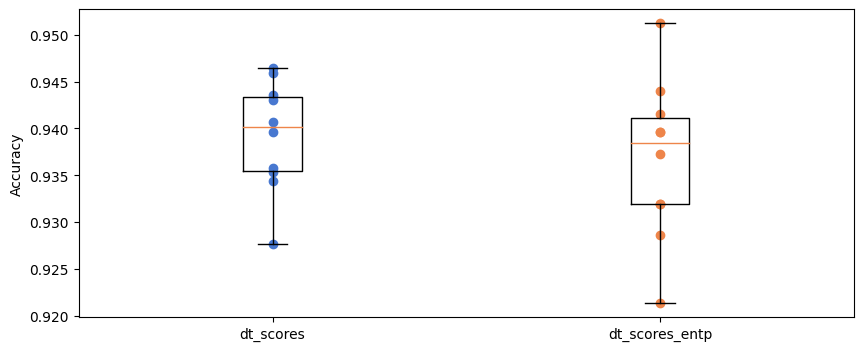

In [24]:
plt.figure(figsize=(10, 4))
plt.plot([1]*10, dt_scores,     ".",markersize=12)
plt.plot([2]*10, dt_scores_entp,    ".",markersize=12)
plt.boxplot([dt_scores,dt_scores_entp], labels=("dt_scores","dt_scores_entp"))
plt.ylabel("Accuracy", fontsize=10)
plt.show()